In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

# Checking the dataset 

In [2]:
cred1=pd.read_csv("application_data.csv")

In [3]:
cred1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

# Checking NULL Values

In [4]:
### checking those columns which have null values and appending their names to a list 


l2=cred1.columns[(cred1.isnull().any())].tolist()

In [5]:
## To check the percentgae of null values present in each column of our dataset

for item in l2:
    print(item,"\t",cred1[item].isnull().sum()/int(cred1.shape[0]) *100.0)

AMT_ANNUITY 	 0.003902299429939092
AMT_GOODS_PRICE 	 0.09040327012692229
NAME_TYPE_SUITE 	 0.42014757195677555
OWN_CAR_AGE 	 65.9908100848425
OCCUPATION_TYPE 	 31.345545362604916
CNT_FAM_MEMBERS 	 0.0006503832383231819
EXT_SOURCE_1 	 56.381072546998325
EXT_SOURCE_2 	 0.21462646864665005
EXT_SOURCE_3 	 19.825307062186393
APARTMENTS_AVG 	 50.74972927797705
BASEMENTAREA_AVG 	 58.51595552679416
YEARS_BEGINEXPLUATATION_AVG 	 48.781019215572776
YEARS_BUILD_AVG 	 66.49778381911543
COMMONAREA_AVG 	 69.87229725115525
ELEVATORS_AVG 	 53.29597965601231
ENTRANCES_AVG 	 50.3487680115508
FLOORSMAX_AVG 	 49.76082156410665
FLOORSMIN_AVG 	 67.84862980511267
LANDAREA_AVG 	 59.376737742714894
LIVINGAPARTMENTS_AVG 	 68.35495315614726
LIVINGAREA_AVG 	 50.193326417591564
NONLIVINGAPARTMENTS_AVG 	 69.43296337366793
NONLIVINGAREA_AVG 	 55.17916432257708
APARTMENTS_MODE 	 50.74972927797705
BASEMENTAREA_MODE 	 58.51595552679416
YEARS_BEGINEXPLUATATION_MODE 	 48.781019215572776
YEARS_BUILD_MODE 	 66.497783819115

# Cleaning Starts

##### Now making two lists
##### 1)Those columns which have more than 40% null values
##### 2)Those  which have less than 40% but greater than 5% null values 

In [6]:



col_to_drop=[]
col_to_change=[]
for item in l2:
    
    x=(cred1[item].isnull().sum()/int(cred1.shape[0]) *100.0)
    if(x>40.0):
        col_to_drop.append(item)
    
    if(x>5.0 and x<40.0):
        
        col_to_change.append(item)


    

In [7]:
## Dropping those columns which have null values > 40%

cred1.drop(col_to_drop,inplace=True,axis=1)


In [8]:
### Just viewing the columns in the col_to_change field 

col_to_change

['OCCUPATION_TYPE',
 'EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [10]:
### These are the columns which we will decide what to do with the null values as they have comparatively less null values.


In [9]:
cred1.drop(["EXT_SOURCE_3","EXT_SOURCE_2"],inplace=True,axis=1)


#Dropping this because we dont see any importance wrt to target variable 

In [10]:

## Checking the shape after columns are deleted


cred1.shape

(307511, 71)

In [11]:
### Also removing FLAG_MOBIL,FLAG_EMP_PHONE etc columns as they are not adding any important value wrt the analysis.

cred1.drop(['FLAG_MOBIL',"FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL"],axis=1,inplace=True)

### Filling NAN Values with either mode or median values 

In [12]:


### Filling NAN values in some of the fields with their mode values


for item in col_to_change[2:]:
    mod_val=cred1[item].mode()[0]
    cred1[item].fillna(mod_val,inplace=True)

In [13]:
cred1["AMT_REQ_CREDIT_BUREAU_YEAR"].isnull().sum()

0

In [14]:

## This is a list of all the other fields which have very few % of null values ie less than 1%

Rest_null = cred1.columns[(cred1.isnull().any())].tolist()
Rest_null

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

In [15]:

## checking the null values of some of the important columns 


cred1[cred1.AMT_ANNUITY.isnull()].head(12)

#We will not impute the values of this column as of now as because the AMT_ANNUITY varies and thus we need to analyse later 
#As the no of null values are very less in amount also

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.0,0.0,0.0,0.0,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.019689,-13902,-3540,-168.0,-4250,Secretaries,2.0,2,2,SATURDAY,12,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,-1331.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apa

In [16]:

## Imputing the OBS and DEF type columns with their mode values since we have checked that max no of values in these columns are 
## 0 and the median and mode values are also same.


cred1['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)
cred1['OBS_60_CNT_SOCIAL_CIRCLE'].mode()
cred1['OBS_60_CNT_SOCIAL_CIRCLE'].mode()
cred1['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)
cred1['DEF_60_CNT_SOCIAL_CIRCLE'].mode()
cred1['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)
cred1['DEF_30_CNT_SOCIAL_CIRCLE'].mode()
cred1['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0.0,inplace=True)



In [17]:
## Checking the Columns for reference

cred1.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:

### From the CNT_FAM_MEMBERS column we have found maximum applicants have 2 family members thus imputing them with the mode value



cred1["CNT_FAM_MEMBERS"].fillna(2.0,inplace=True)

In [19]:
#Flag_Document is not useful to us in our analysis thus dropping them as they dont really add any value to weather 
## to give someone loan or not these are just general documents 

list_of_doc=[]
for item in cred1.columns:
    if("FLAG_DOCUMENT" in item):
        list_of_doc.append(item)

        

In [20]:
### Dropping them 

cred1.drop(list_of_doc,inplace=True,axis=1)

In [21]:
cred1.shape

(307511, 45)

In [22]:
cred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
#also by analysing the columns and by using the column description we found some more columns like REG_CITY,REG_REGION not adding any values 
#Thus dropping them

list_unwanted=['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

In [24]:
## Dropping them ## 

cred1.drop(list_unwanted,inplace=True,axis=1)

In [25]:
cred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [26]:
### Filling NAN values of NAME_TYPE_SUITE with the mode value 

x=cred1.NAME_TYPE_SUITE.mode()[0]
cred1["NAME_TYPE_SUITE"].fillna(x,inplace=True)

In [27]:
## Dropping this as this column does not add any value from goal persepective 
cred1.drop("NAME_TYPE_SUITE",inplace=True,axis=1) 


#### 1)Now most of the cleaning is done we will start more on the analysis part and also focus on OCCUPATION column as it has most of the null values and thus 
####    We need to analyse further wrt to other columns to find about the type of the missing values.

In [28]:



cred1.columns[(cred1.isnull().any())]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'OCCUPATION_TYPE',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [29]:
cred1["NAME_INCOME_TYPE"].value_counts(normalize=True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [30]:
cred1[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]].head(10)

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.0,-2120,-1134.0
1,-16765,-1188,-1186.0,-291,-828.0
2,-19046,-225,-4260.0,-2531,-815.0
3,-19005,-3039,-9833.0,-2437,-617.0
4,-19932,-3038,-4311.0,-3458,-1106.0
5,-16941,-1588,-4970.0,-477,-2536.0
6,-13778,-3130,-1213.0,-619,-1562.0
7,-18850,-449,-4597.0,-2379,-1070.0
8,-20099,365243,-7427.0,-3514,0.0
9,-14469,-2019,-14437.0,-3992,-1673.0


##### Well we have found that the DAYS_ type columns have negative values in them which is not possible as 
##### Someones age cannot be negative thus fixing them


In [31]:
def change_to_positive(x):
    
    return np.abs(x)
    

    

In [32]:
change_list=["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","DAYS_LAST_PHONE_CHANGE"]

In [33]:
for item in change_list:
    cred1[item]=cred1[item].apply(change_to_positive)

#### Now changing the DAYS_BIRTH to year fromat and storing them in a newely genearted column age 

In [34]:
cred1["DAYS_BIRTH"]=cred1["DAYS_BIRTH"].apply(lambda x:int(x/365))

In [35]:
cred1["age"]=cred1["DAYS_BIRTH"]


In [36]:
cred1.drop("DAYS_BIRTH",inplace=True,axis=1)

### CHANGING SOME UNIQUE VALUES IN SOME COLUMN FOR MORE BETTER READABILITY 

In [37]:
cred1.CNT_FAM_MEMBERS=cred1.CNT_FAM_MEMBERS.astype("int64")

In [38]:
cred1.CNT_FAM_MEMBERS.dtype

dtype('int64')

In [39]:
cred1.NAME_EDUCATION_TYPE=cred1.NAME_EDUCATION_TYPE.apply(lambda x:x.replace("Secondary / secondary special","Seconday Special"))

In [40]:
cred1.loc[cred1.NAME_FAMILY_STATUS=="Unknown","NAME_FAMILY_STATUS"]=cred1.NAME_FAMILY_STATUS.mode()[0]

In [41]:
cred1.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [42]:
cred1.loc[cred1.NAME_FAMILY_STATUS=="Single / not married","NAME_FAMILY_STATUS"]="Single"

In [43]:
cred1.loc[cred1.NAME_HOUSING_TYPE=="House / apartment","NAME_HOUSING_TYPE"]="Apartment"

In [44]:
cred1.NAME_HOUSING_TYPE.unique()

array(['Apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [45]:
cred1.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [46]:
cred1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [47]:
### Code gender has some XNA values thus replacing them

cred1.CODE_GENDER.replace('XNA','F',inplace=True)

### Analysisng and Fixing null values in occupation type

In [48]:



temp_set=cred1[cred1.OCCUPATION_TYPE.isnull()][["ORGANIZATION_TYPE","NAME_INCOME_TYPE"]]


In [49]:
temp_set.NAME_INCOME_TYPE.unique()

array(['Pensioner', 'State servant', 'Commercial associate', 'Working',
       'Unemployed', 'Student', 'Maternity leave', 'Businessman'],
      dtype=object)

In [50]:
cred1[cred1.NAME_INCOME_TYPE=="Working"][["OCCUPATION_TYPE"]].value_counts(normalize=True)

OCCUPATION_TYPE      
Laborers                 0.302927
Sales staff              0.155475
Core staff               0.105189
Drivers                  0.096157
Managers                 0.076994
High skill tech staff    0.051190
Accountants              0.038191
Medicine staff           0.036719
Security staff           0.035725
Cooking staff            0.031288
Cleaning staff           0.026133
Low-skill Laborers       0.012671
Private service staff    0.012140
Waiters/barmen staff     0.006784
Secretaries              0.005215
Realty agents            0.003123
HR staff                 0.002084
IT staff                 0.001995
dtype: float64

In [51]:
temp_set["ORGANIZATION_TYPE"].value_counts(normalize=True)

XNA                       0.574452
Business Entity Type 3    0.148738
Other                     0.053864
Self-employed             0.036777
Business Entity Type 2    0.023498
Government                0.021610
School                    0.014970
Business Entity Type 1    0.013590
Medicine                  0.011132
Transport: type 4         0.009700
Construction              0.006764
Military                  0.005706
Industry: type 9          0.005447
Industry: type 11         0.005426
Kindergarten              0.005166
Security Ministries       0.005021
Industry: type 3          0.004544
Trade: type 7             0.004492
Housing                   0.004326
Agriculture               0.003839
University                0.003175
Transport: type 2         0.002936
Police                    0.002666
Hotel                     0.002562
Trade: type 3             0.002469
Security                  0.002428
Bank                      0.002417
Industry: type 7          0.002230
Industry: type 4    

In [52]:
cred1.loc[cred1.NAME_INCOME_TYPE=="Pensioner","ORGANIZATION_TYPE"]="Retired"

In [53]:
cred1[(cred1.NAME_INCOME_TYPE=="Pensioner")][["NAME_INCOME_TYPE","ORGANIZATION_TYPE"]]

,NAME_INCOME_TYPE,ORGANIZATION_TYPE
8,Pensioner,Retired
11,Pensioner,Retired
23,Pensioner,Retired
38,Pensioner,Retired
43,Pensioner,Retired
...,...,...
307469,Pensioner,Retired
307483,Pensioner,Retired
307487,Pensioner,Retired
307505,Pensioner,Retired


In [54]:
cred1.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221095
Retired                   0.180033
Self-employed             0.124909
Other                     0.054252
Medicine                  0.036395
Business Entity Type 2    0.034314
Government                0.033833
School                    0.028916
Trade: type 7             0.025463
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010949
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008562
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

### Analysing the null values of occupation wrt to Organization_type and NAME_INCOME_TYPE for an understanding and we get that 
### mostly pensioner have Organization_type as XNA and Ocuupation type is null and also the OCCUPATION TYPE 


In [55]:
### Now changing occupation type of those who are mainly pensioners####

cred1.loc[cred1.NAME_INCOME_TYPE=="Pensioner","OCCUPATION_TYPE"]="Pensioner"



In [56]:
cred1[(cred1.NAME_INCOME_TYPE=="Pensioner")][["NAME_INCOME_TYPE","OCCUPATION_TYPE"]]

,NAME_INCOME_TYPE,OCCUPATION_TYPE
8,Pensioner,Pensioner
11,Pensioner,Pensioner
23,Pensioner,Pensioner
38,Pensioner,Pensioner
43,Pensioner,Pensioner
...,...,...
307469,Pensioner,Pensioner
307483,Pensioner,Pensioner
307487,Pensioner,Pensioner
307505,Pensioner,Pensioner


In [57]:
cred1.OCCUPATION_TYPE.isnull().sum()/int(cred1.shape[0]) ##checking percentage of null values 

0.13343912900676724

In [58]:
cred1[cred1.OCCUPATION_TYPE.isnull()].head(50)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
28,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,675000.0,State servant,Higher education,Single,Apartment,0.046220,1796,4668.0,2661,NaN,1,1,1,WEDNESDAY,11,Military,0.0,0.0,0.0,0.0,849.0,0.0,0.0,0.0,1.0,0.0,1.0,27
30,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Commercial associate,Seconday Special,Civil marriage,Apartment,0.025164,2668,5266.0,3787,NaN,2,2,2,WEDNESDAY,13,Business Entity Type 3,0.0,0.0,0.0,0.0,1634.0,0.0,0.0,0.0,1.0,0.0,5.0,41
44,100051,0,Cash loans,M,N,Y,0,202500.0,661702.5,48280.5,598500.0,Working,Seconday Special,Civil marriage,Apartment,0.007114,758,4166.0,2380,NaN,2,2,2,WEDNESDAY,12,Business Entity Type 3,1.0,0.0,1.0,0.0,556.0,0.0,0.0,0.0,0.0,0.0,0.0,26
52,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,Working,Seconday Special,Married,Apartment,0.028663,778,1824.0,1992,NaN,2,2,2,TUESDAY,10,Emergency,4.0,0.0,4.0,0.0,466.0,0.0,0.0,0.0,1.0,0.0,0.0,33
63,100075,0,Cash loans,F,N,N,0,112500.0,95940.0,10462.5,90000.0,Working,Higher education,Single,Apartment,0.004960,3720,5246.0,4541,NaN,1,2,2,MONDAY,14,University,0.0,0.0,0.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,5.0,33
76,100088,0,Revolving loans,F,N,N,0,112500.0,135000.0,6750.0,135000.0,Commercial associate,Higher education,Married,Apartment,0.022800,4066,4623.0,2975,NaN,2,2,2,THURSDAY,15,School,0.0,0.0,0.0,0.0,1537.0,0.0,0.0,0.0,0.0,0.0,2.0,53
82,100097,0,Cash loans,M,Y,Y,0,157500.0,760225.5,30280.5,679500.0,Working,Seconday Special,Married,Apartment,0.035792,2442,3500.0,983,NaN,2,2,2,THURSDAY,10,Business Entity Type 3,6.0,0.0,6.0,0.0,371.0,0.0,0.0,1.0,0.0,0.0,0.0,48
88,100103,0,Cash loans,F,N,Y,0,72000.0,450000.0,16965.0,450000.0,Working,Seconday Special,Married,Apartment,0.009175,1694,6057.0,4013,NaN,2,2,2,FRIDAY,12,School,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,900000.0,Commercial associate,Incomplete higher,Single,With parents,0.030755,2015,4802.0,1038,NaN,1,2,2,SUNDAY,13,Industry: type 4,0.0,0.0,0.0,0.0,591.0,0.0,0.0,0.0,0.0,0.0,2.0,27
97,100115,0,Cash loans,F,N,N,0,90000.0,315000.0,14683.5,315000.0,Working,Seconday Special,Married,Apartment,0.028663,367,3071.0,4211,NaN,2,2,2,SUNDAY,11,Business Entity Type 3,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,2.0,2.0,42


#### Storing the original dataframe to a temporaray dataframe ########

In [59]:
cred_temp=cred1[cred1.OCCUPATION_TYPE.isnull()]

In [60]:
cred_temp.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.349344
Other                     0.126529
Self-employed             0.086392
Business Entity Type 2    0.055174
Government                0.050763
School                    0.035142
Business Entity Type 1    0.031925
Medicine                  0.026149
Transport: type 4         0.022786
Construction              0.015889
Military                  0.013379
Industry: type 9          0.012770
Industry: type 11         0.012746
Kindergarten              0.012136
Security Ministries       0.011795
Industry: type 3          0.010674
Trade: type 7             0.010528
Housing                   0.010162
Agriculture               0.009017
University                0.007457
Transport: type 2         0.006897
Police                    0.006263
Hotel                     0.006019
Trade: type 3             0.005800
Security                  0.005703
Bank                      0.005678
Industry: type 7          0.005240
Industry: type 4          0.004313
Restaurant          

In [61]:
cred_temp[(cred_temp.ORGANIZATION_TYPE!="Business Entity Type 3") & (cred_temp.ORGANIZATION_TYPE!="Other")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
28,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,675000.0,State servant,Higher education,Single,Apartment,0.046220,1796,4668.0,2661,NaN,1,1,1,WEDNESDAY,11,Military,0.0,0.0,0.0,0.0,849.0,0.0,0.0,0.0,1.0,0.0,1.0,27
52,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,454500.0,Working,Seconday Special,Married,Apartment,0.028663,778,1824.0,1992,NaN,2,2,2,TUESDAY,10,Emergency,4.0,0.0,4.0,0.0,466.0,0.0,0.0,0.0,1.0,0.0,0.0,33
63,100075,0,Cash loans,F,N,N,0,112500.0,95940.0,10462.5,90000.0,Working,Higher education,Single,Apartment,0.004960,3720,5246.0,4541,NaN,1,2,2,MONDAY,14,University,0.0,0.0,0.0,0.0,280.0,0.0,0.0,0.0,0.0,0.0,5.0,33
76,100088,0,Revolving loans,F,N,N,0,112500.0,135000.0,6750.0,135000.0,Commercial associate,Higher education,Married,Apartment,0.022800,4066,4623.0,2975,NaN,2,2,2,THURSDAY,15,School,0.0,0.0,0.0,0.0,1537.0,0.0,0.0,0.0,0.0,0.0,2.0,53
88,100103,0,Cash loans,F,N,Y,0,72000.0,450000.0,16965.0,450000.0,Working,Seconday Special,Married,Apartment,0.009175,1694,6057.0,4013,NaN,2,2,2,FRIDAY,12,School,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307444,456182,0,Revolving loans,F,N,Y,2,90000.0,270000.0,13500.0,270000.0,Working,Seconday Special,Married,Apartment,0.018634,2190,3932.0,4562,NaN,4,2,2,TUESDAY,12,Self-employed,6.0,0.0,6.0,0.0,414.0,0.0,0.0,0.0,0.0,0.0,0.0,38
307447,456185,0,Cash loans,F,N,Y,0,135000.0,528633.0,22527.0,472500.0,Working,Seconday Special,Married,Apartment,0.019101,4606,2769.0,2769,NaN,2,2,2,WEDNESDAY,13,Trade: type 7,0.0,0.0,0.0,0.0,1023.0,0.0,0.0,0.0,0.0,1.0,3.0,30
307452,456191,0,Cash loans,F,Y,N,2,153000.0,1350000.0,46926.0,1350000.0,Working,Seconday Special,Married,Apartment,0.030755,397,3964.0,2745,NaN,4,2,2,THURSDAY,14,Restaurant,0.0,0.0,0.0,0.0,741.0,0.0,0.0,0.0,2.0,0.0,1.0,35
307468,456208,0,Cash loans,F,N,Y,1,135000.0,305955.0,21888.0,283500.0,Working,Higher education,Civil marriage,Apartment,0.020246,1266,7511.0,1053,NaN,3,3,3,THURSDAY,9,Industry: type 12,2.0,0.0,2.0,0.0,499.0,0.0,0.0,0.0,0.0,1.0,2.0,26


In [62]:
cred1[(cred1.OCCUPATION_TYPE.notnull()) & (cred1.ORGANIZATION_TYPE=="Business Entity Type 3")][["OCCUPATION_TYPE"]].value_counts(normalize=True)

OCCUPATION_TYPE      
Laborers                 0.325847
Sales staff              0.165002
Managers                 0.133038
Drivers                  0.102043
Accountants              0.060555
High skill tech staff    0.058765
Cooking staff            0.030193
Security staff           0.025515
Cleaning staff           0.023353
Core staff               0.022682
Low-skill Laborers       0.014034
Waiters/barmen staff     0.009822
Private service staff    0.008909
Medicine staff           0.005946
HR staff                 0.004138
Secretaries              0.003821
Realty agents            0.003243
IT staff                 0.003094
dtype: float64

### After analysing every organizational type value against occupation type values we can see that occupation type are missing completely at random so its better
### to impute the occupation type values by the phrase "missing"

In [63]:


cred1.OCCUPATION_TYPE.fillna("missing",inplace=True)

In [64]:
cred1.OCCUPATION_TYPE.value_counts(normalize=True)

Pensioner                0.180033
Laborers                 0.179457
missing                  0.133439
Sales staff              0.104390
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027758
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015125
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [65]:
cred1.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
FLAG_OWN_REALTY                  0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
AMT_CREDIT                       0
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
NAME_INCOME_TYPE                 0
NAME_EDUCATION_TYPE              0
NAME_FAMILY_STATUS               0
NAME_HOUSING_TYPE                0
REGION_POPULATION_RELATIVE       0
DAYS_EMPLOYED                    0
DAYS_REGISTRATION                0
DAYS_ID_PUBLISH                  0
OCCUPATION_TYPE                  0
CNT_FAM_MEMBERS                  0
REGION_RATING_CLIENT             0
REGION_RATING_CLIENT_W_CITY      0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
ORGANIZATION_TYPE                0
OBS_30_CNT_SOCIAL_CIRCLE         0
DEF_30_CNT_SOCIAL_CIRCLE         0
OBS_60_CNT_SOCIAL_CI

### Well Now Cleaning is mostly completely still sone columns like AMT_ANNUITY and AMT_GOODS_PRICE has missing values which 
### we will look into in more detail after some univariate anlysis to find the data trend 


# 

##  Univariate Ananlysis Outlier Detection 

In [68]:
cred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

<AxesSubplot:xlabel='AMT_ANNUITY'>

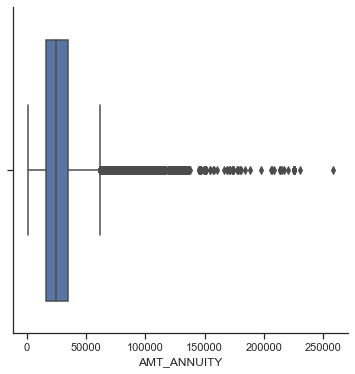

In [66]:
plt.figure(figsize=(6,6))

sns.boxplot(cred1.AMT_ANNUITY)

##### Well we can infer one thing that AMT_ANNUITY has outliers present in it and one of the outlier is very far from the IQR range

In [67]:
cred1.AMT_ANNUITY.quantile(1.00)
cred1.AMT_ANNUITY.describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [68]:
cred1.AMT_ANNUITY.quantile(1.00)

258025.5

In [69]:
### Imputing those 12  null values with median 

cred1.AMT_ANNUITY.fillna(cred1.AMT_ANNUITY.median(),inplace=True)


In [70]:
cred1.AMT_ANNUITY.isnull().sum()

0

#### Well this value is very high compared to the 75% value 

#### Thus AMT_ANNUITY has outliers in it.


######## Now creating list of numerical variables for outlier detection and finding insights #########

In [71]:
list_numerical=[]
for item in cred1.columns:
    if(cred1[item].dtype=="int64" or cred1[item].dtype=="float64"):
        list_numerical.append(item)
        
    
list_numerical
        

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'age']

In [72]:
len(list_numerical)

27

# PLOTTING BOXPLOTS #####

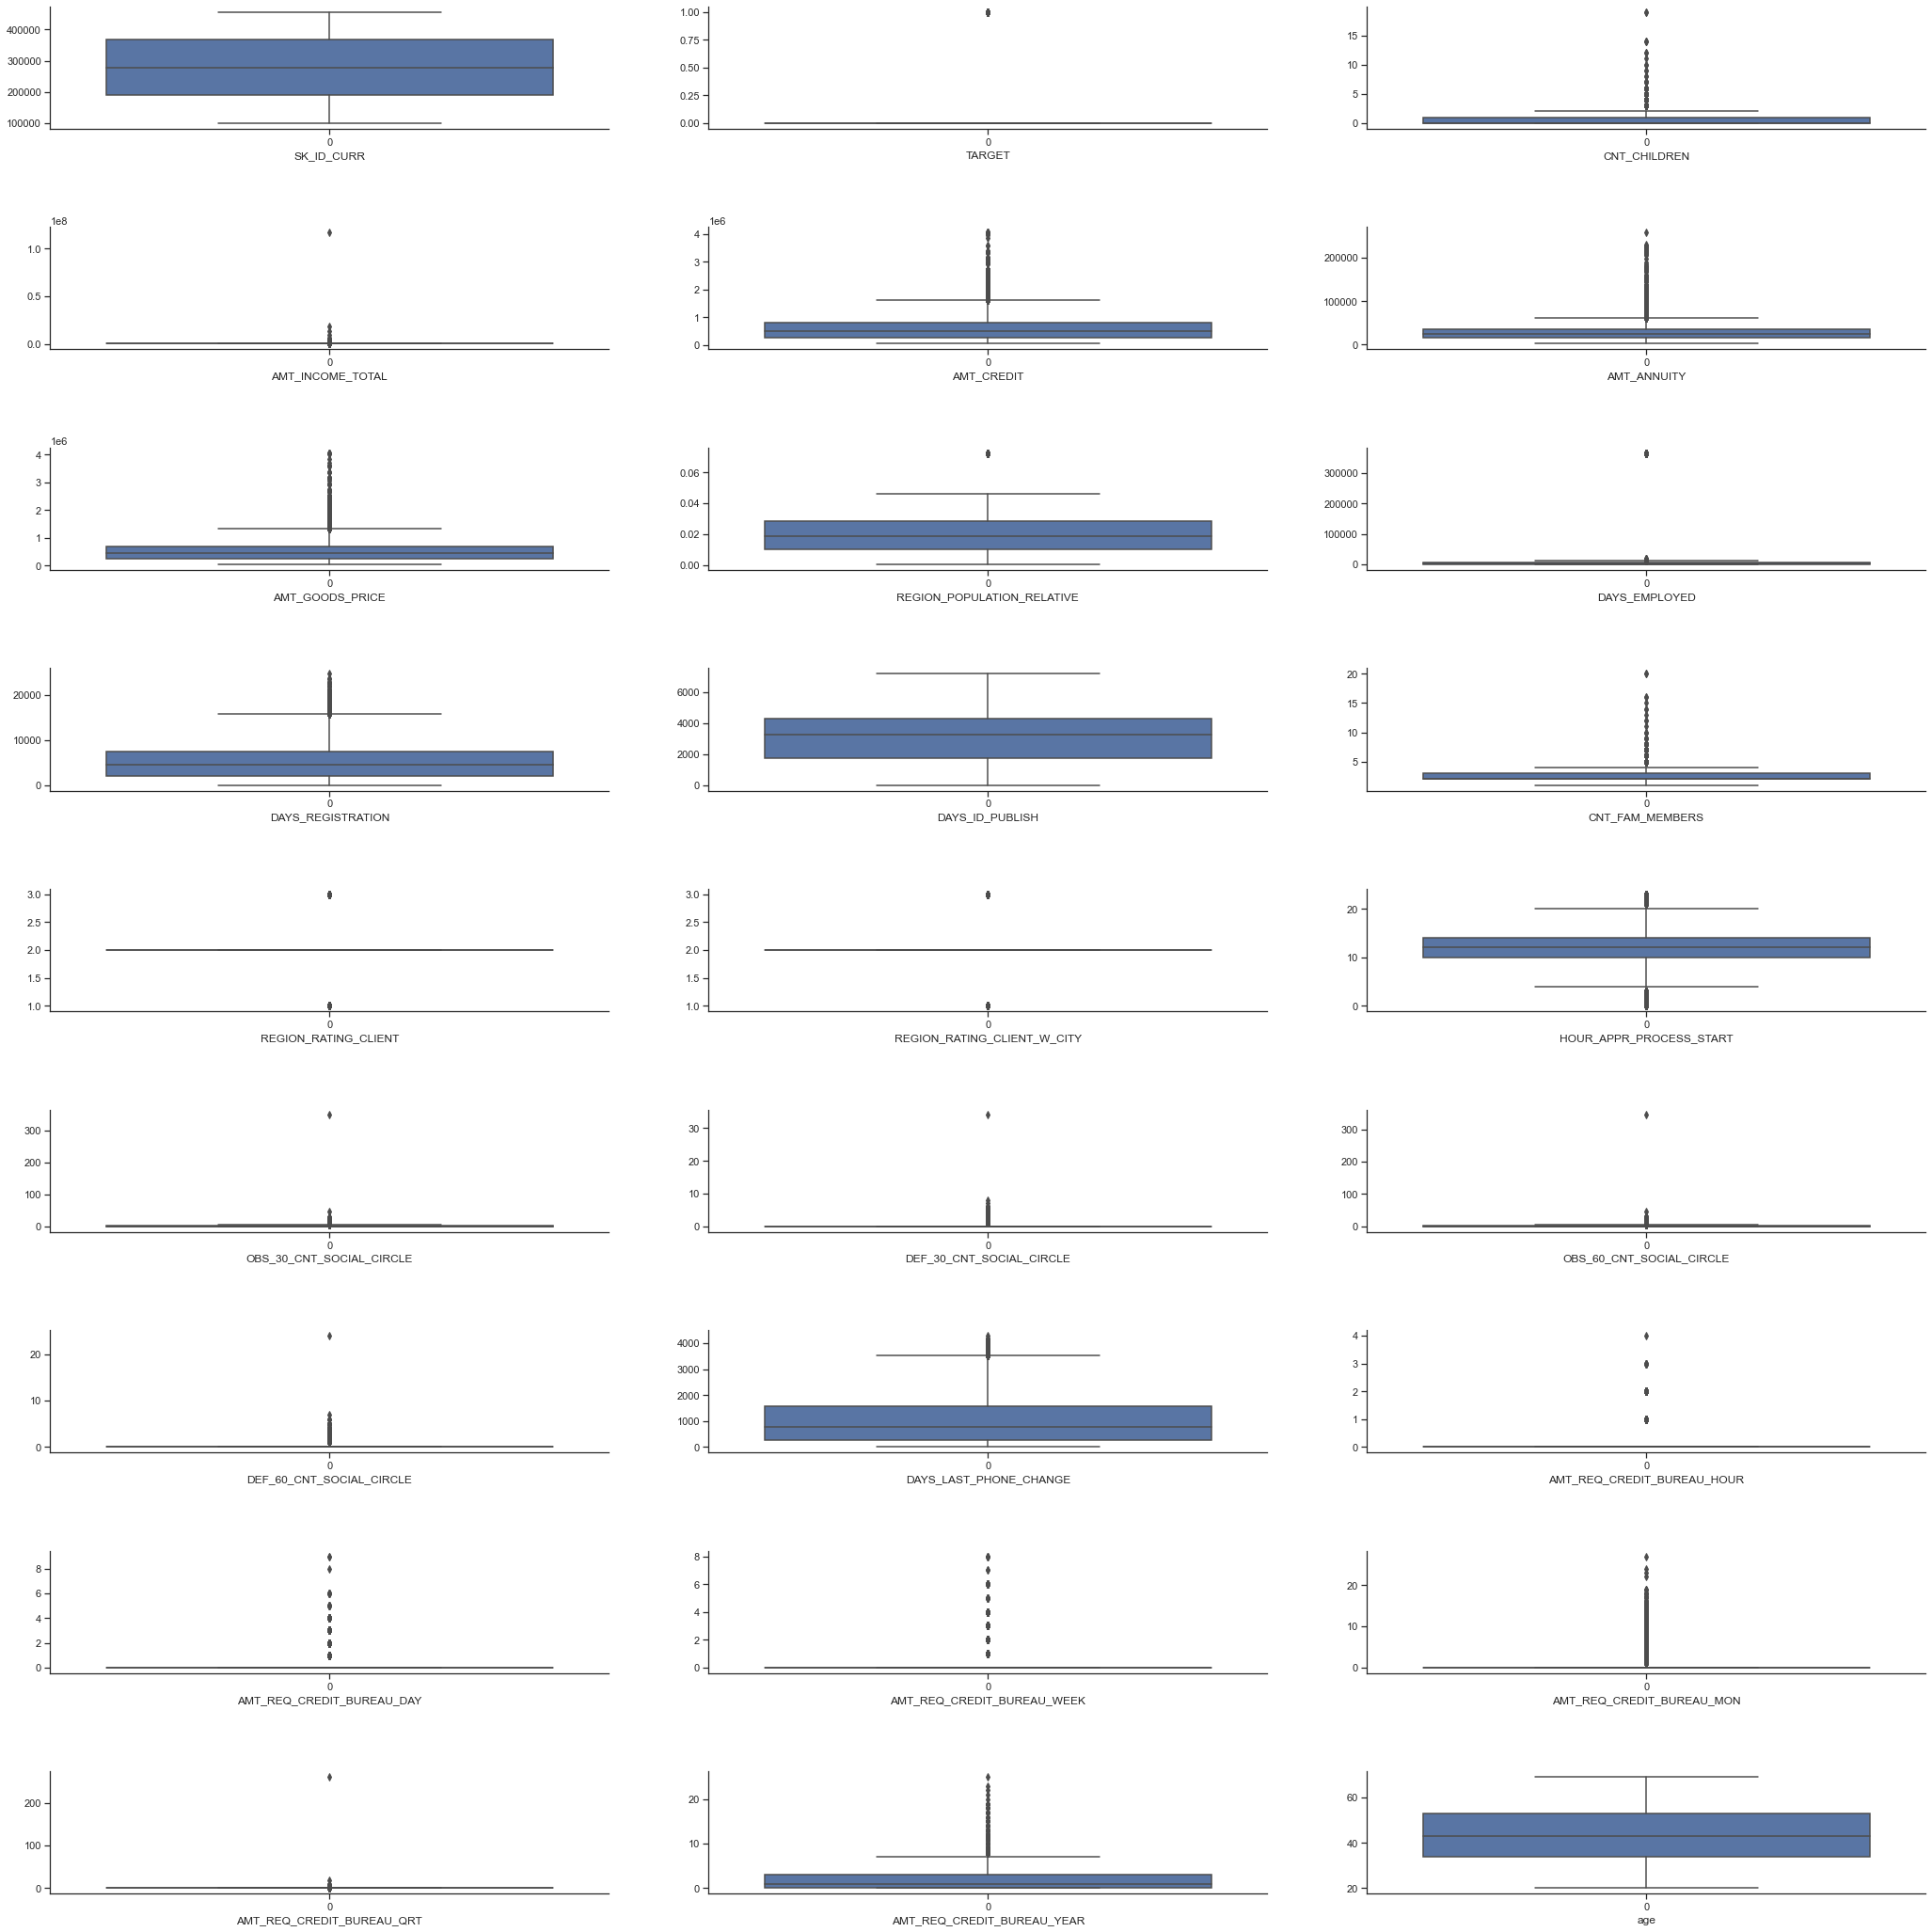

In [73]:
fig, axes = plt.subplots(9, 3,figsize=(30,30))
count=0
for item,ax in zip(list_numerical,axes.flatten()):
    
    sns.boxplot(data=cred1[item],ax=ax)
    ax.set_xlabel(item)

fig.tight_layout(pad=5.0)    
plt.show()

    

    

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

#### outlier analysis  of each numerical variable one by one #####


In [74]:
print(cred1.CNT_CHILDREN.describe())
print(cred1.CNT_CHILDREN.value_counts(normalize=True))

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
0     0.700368
1     0.198754
2     0.086986
3     0.012087
4     0.001395
5     0.000273
6     0.000068
7     0.000023
14    0.000010
19    0.000007
12    0.000007
10    0.000007
9     0.000007
8     0.000007
11    0.000003
Name: CNT_CHILDREN, dtype: float64


#### From the CNT_CHILDREN plot we can see there are many outliers but most of the applicants do not have any children and the median 
#### value is also zero 
#### And by doing value_counts we can see some applicants are having children but the IQR lies between 0 to 1.
#### Thus from our analyses we can conclude there are outliers but the no of outliers are very less compared to the bulk of the values.

In [75]:
print(cred1.AMT_INCOME_TOTAL.describe())
print(cred1.AMT_INCOME_TOTAL.quantile(0.99))
print(cred1.AMT_INCOME_TOTAL.quantile(0.5))
print(cred1.AMT_INCOME_TOTAL.quantile(0.75))
print(cred1.AMT_INCOME_TOTAL.quantile(1.00))

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
472500.0
147150.0
202500.0
117000000.0


In [76]:


cred1[cred1.AMT_INCOME_TOTAL==cred1.AMT_INCOME_TOTAL.quantile(1.00)]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Working,Seconday Special,Married,Apartment,0.010643,922,6762.0,3643,Laborers,3,2,2,TUESDAY,14,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,34


#####  Now analysing the Income of the applicants we found that the variance of data is very high. And also there are some outliers
#### which are close to the 99th percentile value and there is an outlier which has a very high value
#### Thus the AMT_INCOME has outliers in it and also for our analysis we will bin these values based on the percentiles as 
#### there is a high variance of the values.


#### And another interesting case is that the person with the highest income is a loan defaulter.




In [77]:
print(cred1.AMT_CREDIT.describe())
print(cred1.AMT_CREDIT.quantile(0.99))
print(cred1.AMT_CREDIT.quantile(0.75))
print(cred1.AMT_CREDIT.quantile(1.00))

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
1854000.0
808650.0
4050000.0


#### Maximum no of credit amount/loan value of the applicants are within the IQR range while some values
#### also are out of this range but directly cannot be called as outliers as there is a continuous distribution and
#### there is no major spike between any value 



In [78]:
print(cred1.AMT_ANNUITY.describe())
print(cred1.AMT_ANNUITY.quantile(0.99))
print(cred1.AMT_ANNUITY.quantile(0.5))
print(cred1.AMT_ANNUITY.quantile(0.75))
print(cred1.AMT_ANNUITY.quantile(1.00))

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
70006.5
24903.0
34596.0
258025.5


In [79]:
print(cred1.AMT_GOODS_PRICE.describe())
print(cred1.AMT_GOODS_PRICE.quantile(0.99))
print(cred1.AMT_GOODS_PRICE.quantile(0.5))
print(cred1.AMT_GOODS_PRICE.quantile(0.75))
print(cred1.AMT_GOODS_PRICE.quantile(1.00))

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
1800000.0
450000.0
679500.0
4050000.0


#### Well AMT_GOODS_PRICE has very similar trends to that of AMT_CREDIT_TYPE which means that the amount of laon credit taken
#### And the price of the goods for which the loan was taken is almost similar 
#### We will further analyse more in the next section and will try to impute the missing values of AMT_GOODS price with those 
#### that of the AMT_CREDIT 

In [80]:
cred1.DAYS_EMPLOYED.describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### This is an erroneous value as DAYS_EMPLOYED cannot be more than 60 years some coulumns have values 365243 days ie nearly 1000
### years.It definately is an outlier and an erroneous once. 

In [81]:
cred1[cred1.DAYS_EMPLOYED==cred1.DAYS_EMPLOYED.max()].head(50)  ## we have found some unusual values thus performig some ananlysis further 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,age
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Pensioner,Seconday Special,Married,Apartment,0.018634,365243,7427.0,3514,Pensioner,2,2,2,WEDNESDAY,14,Retired,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,55
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Pensioner,Seconday Special,Married,Apartment,0.015221,365243,5246.0,2512,Pensioner,2,2,2,FRIDAY,7,Retired,0.0,0.0,0.0,0.0,2396.0,0.0,0.0,0.0,0.0,0.0,2.0,55
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Pensioner,Seconday Special,Married,Apartment,0.006296,365243,9012.0,3684,Pensioner,2,3,3,FRIDAY,12,Retired,0.0,0.0,0.0,0.0,795.0,0.0,0.0,0.0,0.0,0.0,3.0,68
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Pensioner,Seconday Special,Married,Apartment,0.006207,365243,9817.0,4969,Pensioner,2,2,2,FRIDAY,11,Retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,65
43,100050,0,Cash loans,F,N,Y,0,108000.000,746280.0,42970.5,675000.0,Pensioner,Higher education,Single,Apartment,0.010966,365243,5745.0,4576,Pensioner,1,2,2,WEDNESDAY,9,Retired,0.0,0.0,0.0,0.0,491.0,0.0,0.0,0.0,0.0,0.0,3.0,64
46,100053,0,Cash loans,F,N,Y,0,202500.000,305221.5,17649.0,252000.0,Pensioner,Seconday Special,Single,Apartment,0.019689,365243,7760.0,1993,Pensioner,1,2,2,MONDAY,8,Retired,0.0,0.0,0.0,0.0,649.0,0.0,0.0,0.0,0.0,2.0,4.0,55
54,100062,0,Cash loans,M,Y,N,0,81000.000,675000.0,32472.0,675000.0,Pensioner,Seconday Special,Married,Apartment,0.010006,365243,6936.0,2142,Pensioner,2,2,2,TUESDAY,17,Retired,0.0,0.0,0.0,0.0,462.0,0.0,0.0,0.0,0.0,0.0,2.0,50
56,100064,0,Cash loans,F,N,N,0,67500.000,298728.0,15381.0,202500.0,Pensioner,Seconday Special,Single,Municipal apartment,0.019101,365243,2019.0,1344,Pensioner,1,2,2,MONDAY,9,Retired,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59
62,100073,0,Cash loans,M,Y,Y,0,324000.000,1130760.0,40189.5,810000.0,Pensioner,Higher education,Civil marriage,Apartment,0.018850,365243,1042.0,3967,Pensioner,2,2,2,THURSDAY,9,Retired,0.0,0.0,0.0,0.0,2385.0,0.0,0.0,0.0,0.0,1.0,1.0,62
79,100094,0,Cash loans,F,N,Y,0,108000.000,113760.0,5301.0,90000.0,Pensioner,Higher education,Single,Apartment,0.030755,365243,12623.0,3442,Pensioner,1,2,2,THURSDAY,10,Retired,3.0,0.0,3.0,0.0,260.0,0.0,0.0,0.0,0.0,0.0,0.0,62





#### From our analysis of the DAYS_EMPLOYED column we can find that there are outliers in the column and those outliers are present
### in a chunk so thus concluding that this column has some error while collecting data.
### We are not dropping thsese rows as there are quite a few rows and these applicants may are non defaulters a

### This column we will not consider much as ananlysis point of view 

In [82]:
cred1.CNT_FAM_MEMBERS.describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

### Well most families have 2-3 family members present 
### Some outliers are also present where there are 15 or 20 family members



count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: age, dtype: float64


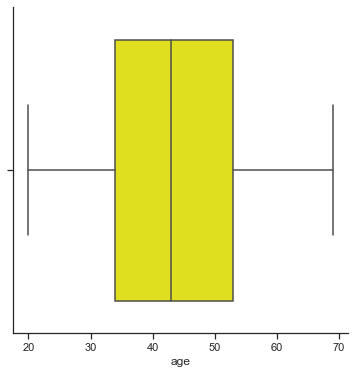

In [84]:


print(cred1.age.describe())
plt.figure(figsize=(6,6))
sns.boxplot(cred1.age,color="yellow")
plt.show()

### We can see that maximum no of applicants are between the age group of 30-60
### It does not have any outliers 

In [85]:
### Lastly imputing the AMT_GOODS_PRICE with median values

cred1.AMT_GOODS_PRICE.fillna(cred1.AMT_GOODS_PRICE.median(),inplace=True)

#  

#


####  Insights From These plots

####  Most numerical columns have outliers present some are erroneous while others are because of the varience of the values.

#### DEF_ and OBS_ type columns are having majority 0 values and add very less importance towards our analysis
#### REG_CITY and AMT_WEEK and all columns of these naming conventions are also not required as they have very few values in
#### the IQR range.


#### Rest other values we have done our analysis 

####  

### Now starting with binning some columns into appropriate groups for better analysis

###  

##### Changing the values of FLAG_OWN_CAR and FLAG_OWN_VEHICLE dtypes for better analysis ######

In [86]:
cred1.FLAG_OWN_CAR=cred1.FLAG_OWN_CAR.apply(lambda x:1 if x=="Y" else 0)

In [87]:
cred1.FLAG_OWN_CAR.unique()

array([0, 1], dtype=int64)

In [88]:
cred1.FLAG_OWN_CAR.value_counts(normalize=True)

0    0.659892
1    0.340108
Name: FLAG_OWN_CAR, dtype: float64

In [89]:
cred1.FLAG_OWN_REALTY=cred1.FLAG_OWN_REALTY.apply(lambda x:1 if x=="Y" else 0)

In [90]:
cred1.FLAG_OWN_REALTY.value_counts(normalize=True)

1    0.693673
0    0.306327
Name: FLAG_OWN_REALTY, dtype: float64

In [91]:
cred1["age_group"]=pd.cut(x=cred1.age,bins=[19,35,55,70],labels=["young","middle aged","senior citizen"])

In [92]:
cred1["age_group"].value_counts(normalize=True)

middle aged       0.498122
young             0.299967
senior citizen    0.201911
Name: age_group, dtype: float64

In [93]:
cred1.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [94]:
cred1.AMT_INCOME_TOTAL.quantile([0.0,0.2,0.4,0.6,0.8,1.0])


0.0        25650.0
0.2        99000.0
0.4       135000.0
0.6       162000.0
0.8       225000.0
1.0    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [95]:
cred1["Income_Range"]=pd.qcut(x=cred1.AMT_INCOME_TOTAL,q=[0.0,0.2,0.4,0.6,0.8,1.0],labels=["very low","low","medium","high","very high"])

In [96]:
cred1["Income_Range"].value_counts(normalize=True)

low          0.278871
high         0.245562
very low     0.207053
very high    0.153224
medium       0.115290
Name: Income_Range, dtype: float64

# NOW AFTER ALL THIS CLEANING OF DATA WE ARE FINALLY STARTING WITH DATA VISUALISATION #

#


#  

#### BIVARIATE ANALYSIS WITH RESPECT TO TARGET VARIABLE #### 

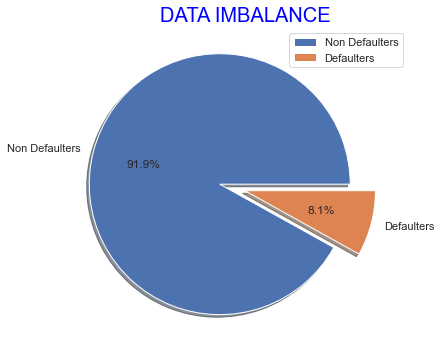

In [97]:
cred1.TARGET.value_counts(normalize=True)
l1=list(cred1.TARGET.value_counts(normalize=True))

plt.figure(figsize=(6,6))
plt.pie(l1,labels=["Non Defaulters","Defaulters"],autopct='%.1f%%',explode=[0.2,0],shadow=True)
plt.legend()
plt.title(label="DATA IMBALANCE",
          fontsize=20,
          color="Blue",loc="center")
plt.show()



#### From this pie plot we can infer there is a high data imbalance ratio ie the no of defaulters is quite less than 
#### the no of non defaulters

In [98]:
### Calculating data imbalace ratio ####

target_ndef=cred1[cred1.TARGET==0]
target_ndef
target_def=cred1[cred1.TARGET==1]
target_def
imbalance_ratio=int(target_def.shape[0])/int(target_ndef.shape[0])
print(imbalance_ratio)

0.08781828601345662


# 

#### PAIR PLOT OF SOME OF THE IMPORTANT NUMERICAL COLUMNS ####

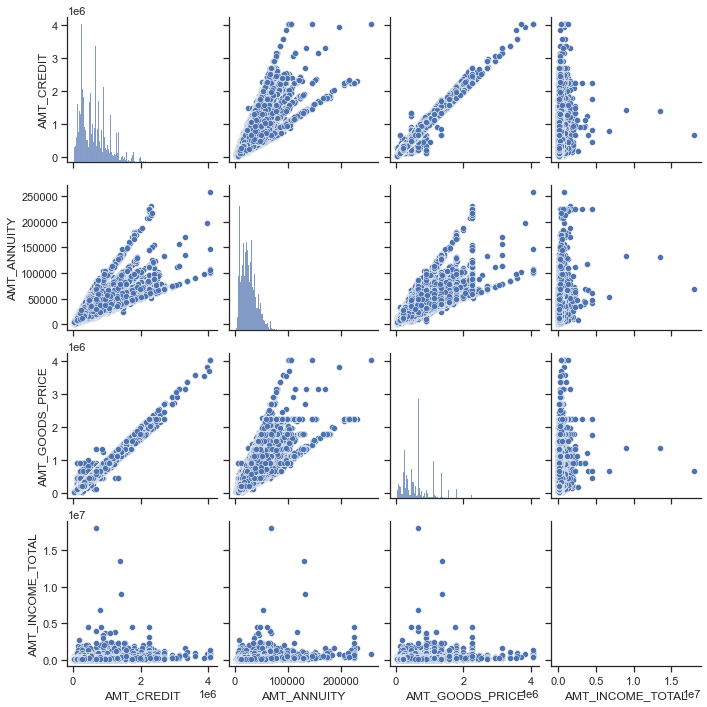

In [99]:
###v to get an eagles eye view we are doing pair plot for all the numerical variables


### selecting for non defaulters 

sns.pairplot(data=cred1[cred1.TARGET==0],vars=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL'])
plt.show()

# 

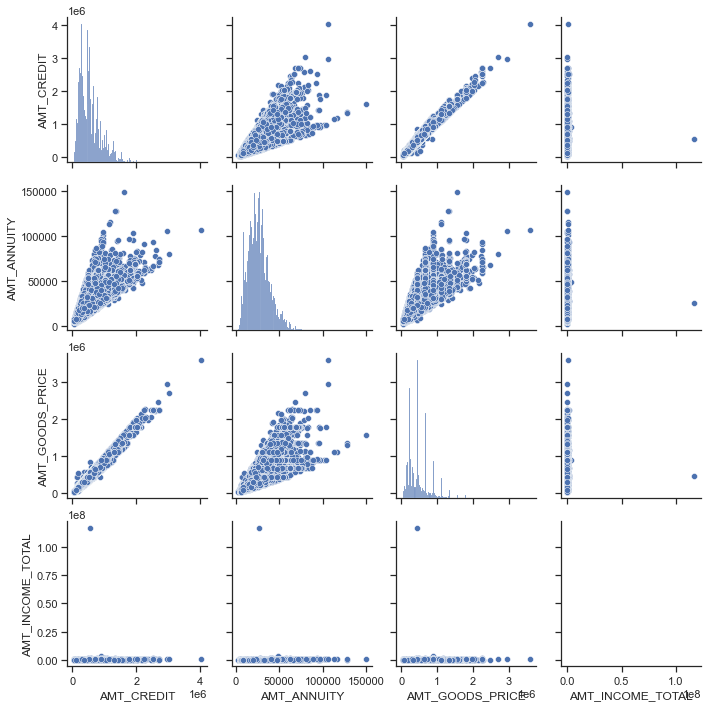

In [100]:
# For Defaulters 


sns.pairplot(data=cred1[cred1.TARGET==1],vars=['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_INCOME_TOTAL'])
plt.show()

# 

# INSIGHTS

### 1) AMT_CREDIT AND AMT_GOODS_PRICE are higly correlated for both defaulters and non defaulters which is quite logical
###    as the loan is mostly taken for the goods that the user purchases in most of the cases.

### 2) AMT_CREDIT AND AMT_ANNUITY are also sharing a good correlation among them for both defaulters and non defaulters 
###    This suggests that as the loan amount becomes higher the amount of EMI/interest also becomes larger , while in some 
###    cases we see some higher credit amount and lower EMIs that is also a trend which we can see.



# 

# 

### STARTING OFF WITH CATEGORICAL ANALYSIS ### 

# 

In [101]:
cred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [102]:
list_categorical_analysis=["NAME_CONTRACT_TYPE","CODE_GENDER","NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","age_group","Income_Range","CNT_CHILDREN","CNT_FAM_MEMBERS"]
len(list_categorical_analysis)

10

## Plotting BAR PLOTS OF TARGET VARIABLE vs ALL_OTHER_CATEGORICAL COLUMNS 

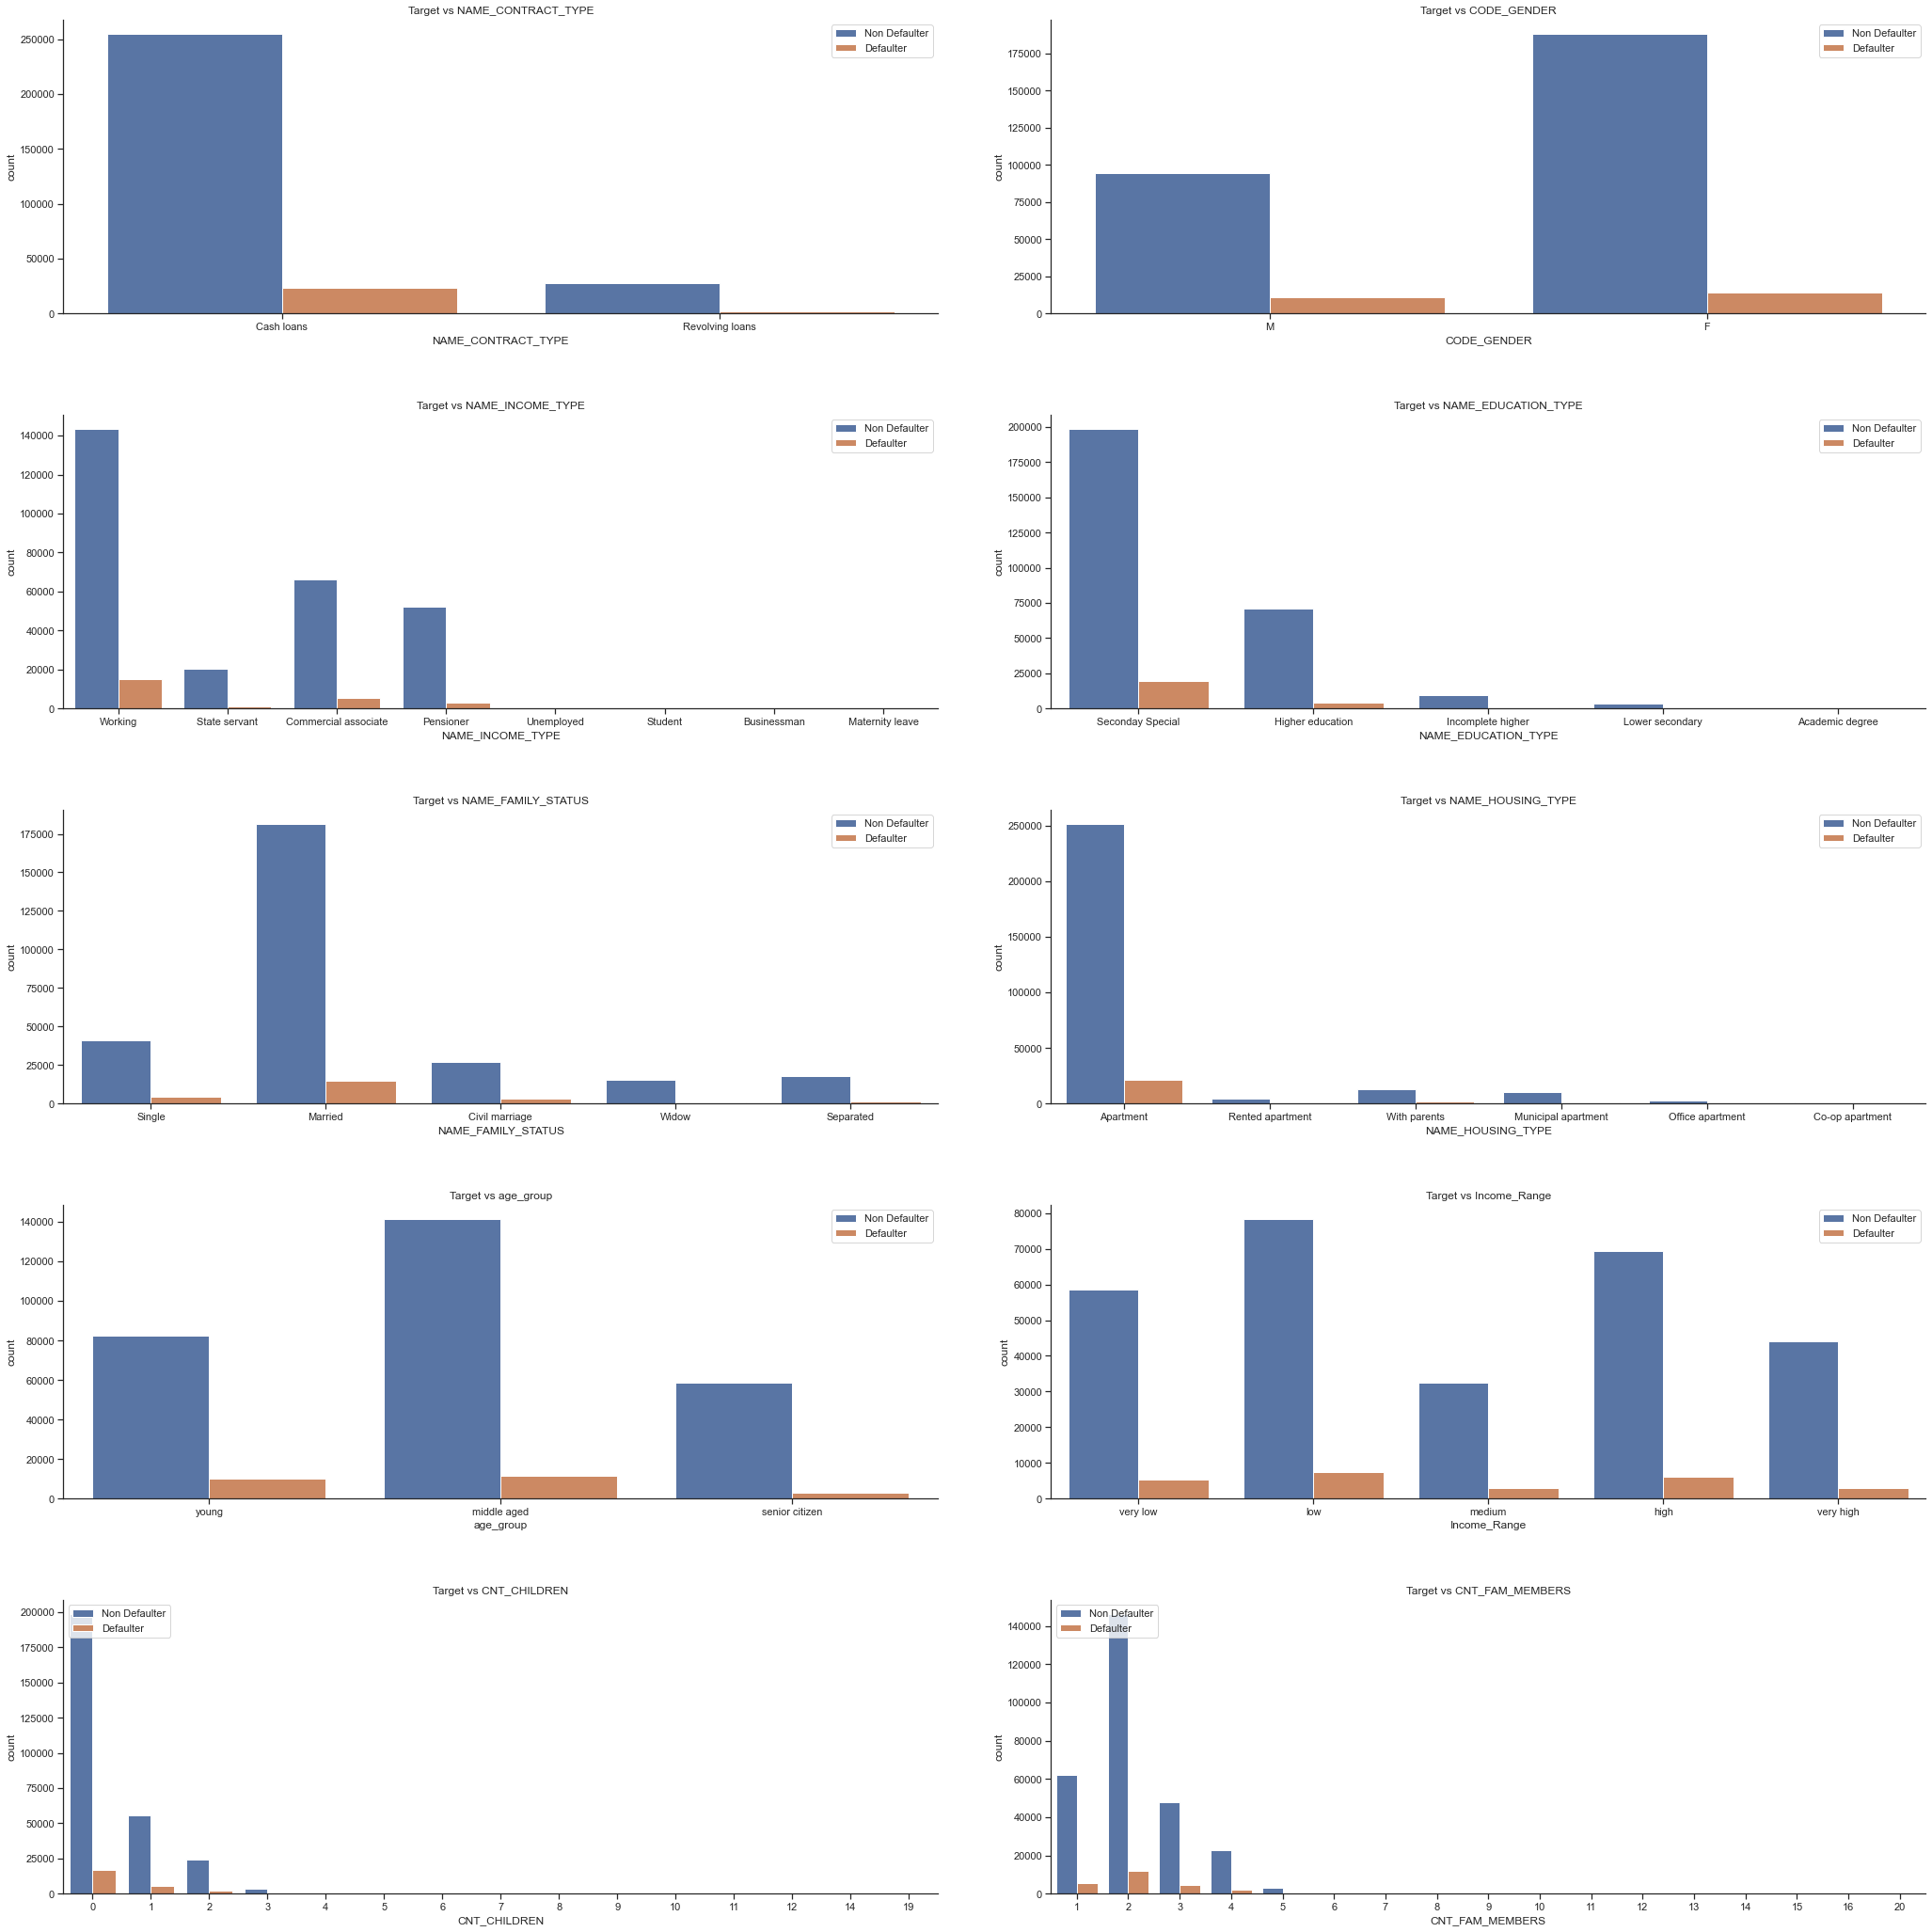

In [103]:
fig, axes = plt.subplots(5, 2,figsize=(30,30))

for item,ax in zip(list_categorical_analysis,axes.flatten()):
    
    sns.countplot(data=cred1,x=item,hue="TARGET",ax=ax)
    ax.set_title("Target"+" vs "+item)
    ax.legend(labels=["Non Defaulter","Defaulter"])
        

fig.tight_layout(pad=5.0)

plt.show()


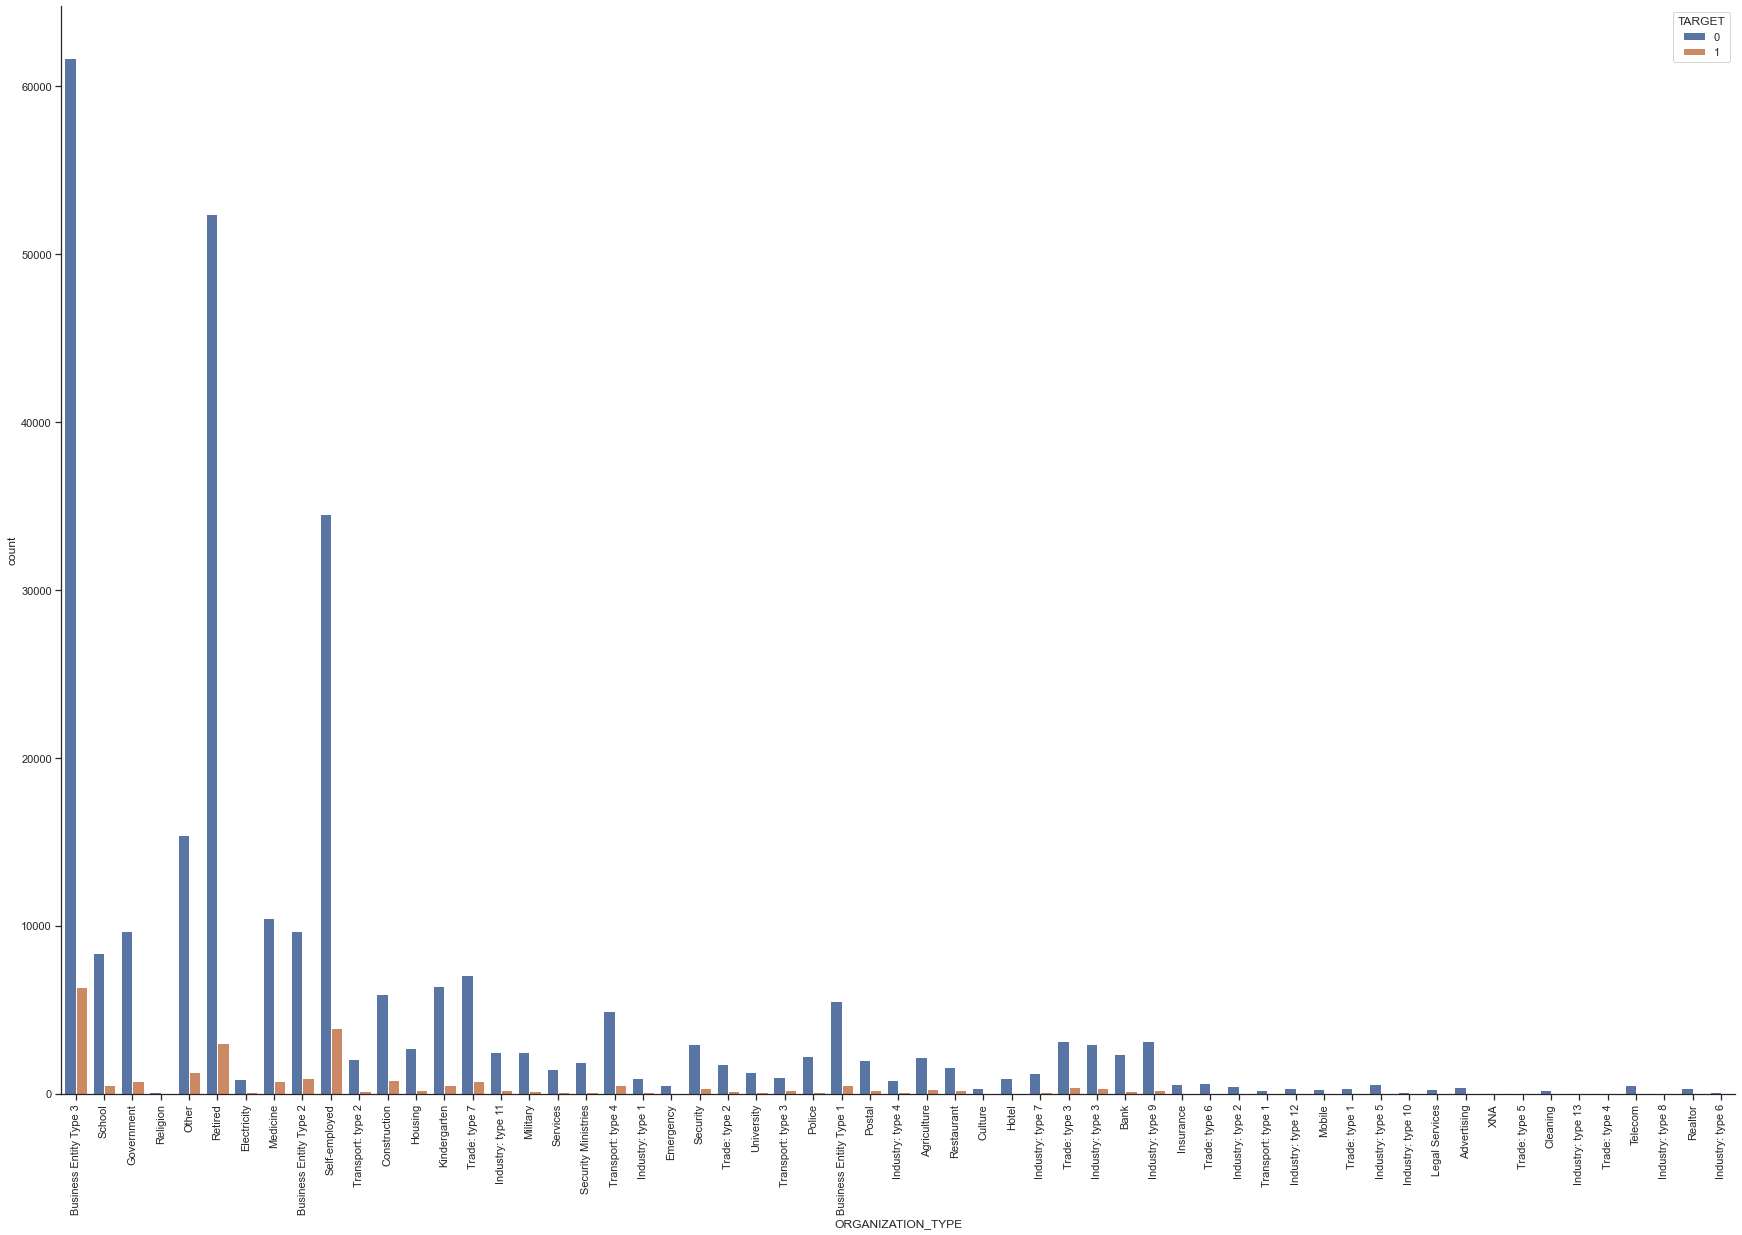

In [104]:

plt.figure(figsize=(30,20))
sns.countplot(data=cred1,x="ORGANIZATION_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.show()


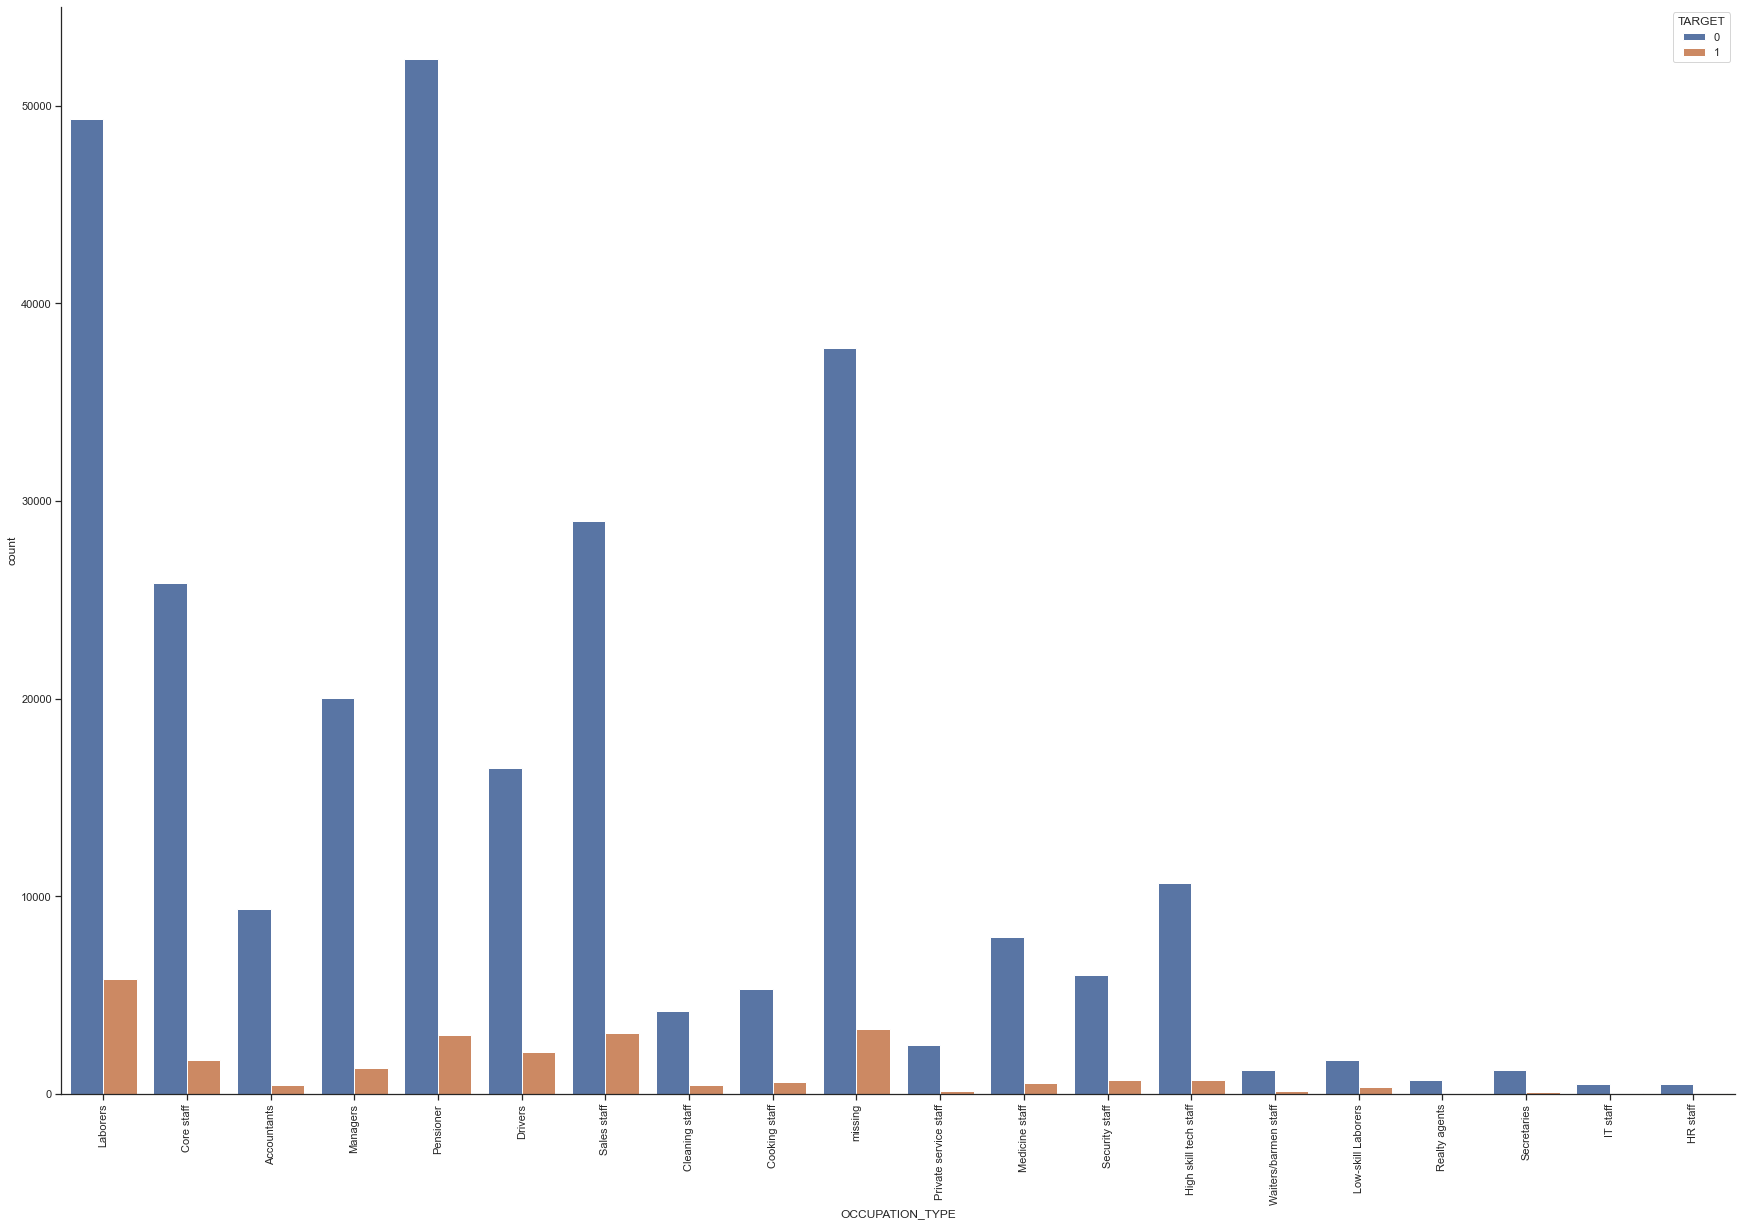

In [108]:
plt.figure(figsize=(30,20))
sns.countplot(data=cred1,x="OCCUPATION_TYPE",hue="TARGET")
plt.xticks(rotation=90)
plt.show()


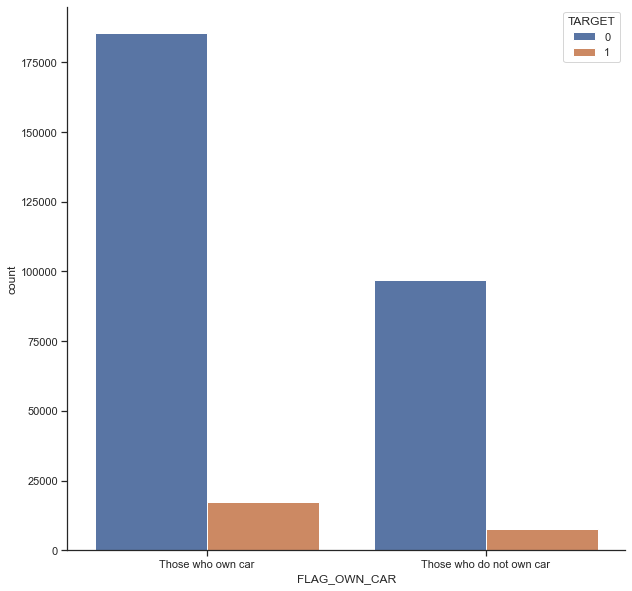

In [105]:
plt.figure(figsize=(10,10))
g=sns.countplot(data=cred1,x=cred1.FLAG_OWN_CAR,hue="TARGET")
g.set_xticklabels(["Those who own car","Those who do not own car"])

plt.show()


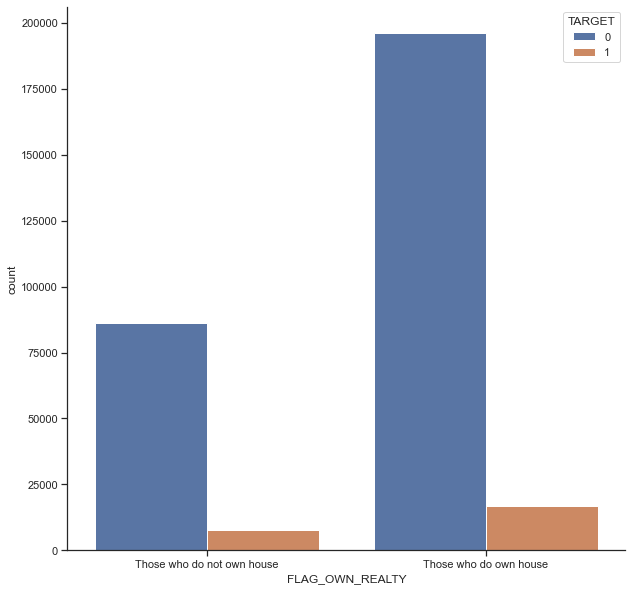

In [110]:
plt.figure(figsize=(10,10))
h=sns.countplot(data=cred1,x=cred1.FLAG_OWN_REALTY,hue="TARGET")
h.set_xticklabels(["Those who do not own house","Those who do own house"])
plt.show()

# Insights 

### 1) Cash loans are a more viable option in both cases for defaulters and non defaulters

### 2) From gender perspective Female applicants are better compared to male as there are less defaulters in Female than in Male 
### 3) From INCOME Type we can se working class people are taking more loans and there are large no of defaulters present
###    in them.Also pensioners are taking loans which is quite interesting and there are a good no of defaulters.


### 4) From education perspective those having secondary special education are taking large no of loans and majority of defaulters and non
###     Defaulters are present in this category only , while the Academic degree people are taking very few loans.

### 5) Married people are taking most loans which is quite logical as they form majority of the population and mostly apply for house and car loans.Both deafulters and non defaulters are presnt in high amount.Also those who are Widows are not having any defaulters.

### 6) Those living in apartments are taking more loan compared to all others and also have the highest no of defaulters.



### 7) Middle aged people are taking more loans and have the highest no of defaulters and non defaulters while Snenior citizen and Young people are alos taking loans.While Senior citizen are better as there are less no of defaulters among them.

### 8)  Those having low income range are taking more loans and the non defaulter amount is more , while all other income types are having high defaulters among them.Therefore one thing can be assumed that people from all types of income range are taking loans and those of high income range are not able to pay EMIS on timely basis and becoming defaulters.

### 9) Most people have no children and some have 1 or 2 children in their family 
### 10) Most People have 2 family members both defaulters and non defaulters


### 11) Most of the people work in Buisness Entity type 3 and have the most defaulters and non defaulters and those working in Industry are not taking many loans for all of the industry types.

### 12) Also people owning cars have most defaulters and those who dont own car have less defaulters
### 13) And a similar trend is shown for those owning house and those who dont own house.



In [ ]:
     ########      Numerical Univariate Analysis wrt Target Variable ###########

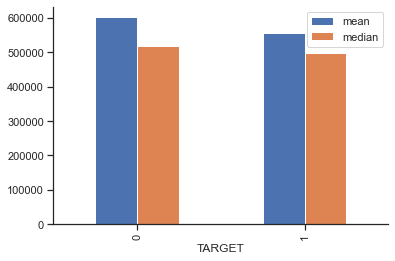

In [106]:
cred1.groupby(by ="TARGET")["AMT_CREDIT"].aggregate(['mean', 'median']).plot.bar()
plt.show()

## Distribution plot for the important numerical variables

In [107]:
list_numerical=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]



### FOR NON DEFAULTERS

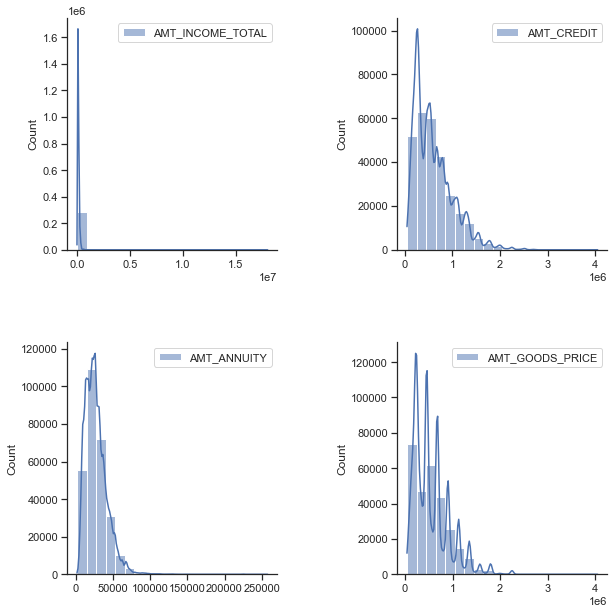

In [108]:


fig, axes = plt.subplots(2, 2,figsize=(10,10))

for item,ax in zip(list_numerical,axes.flatten()):
    
    sns.histplot(data=cred1[(cred1.TARGET==0)][[item]],kde=True,bins=20,ax=ax)
    
fig.tight_layout(pad=5.0)

plt.show()


### FOR DEFAULTERS

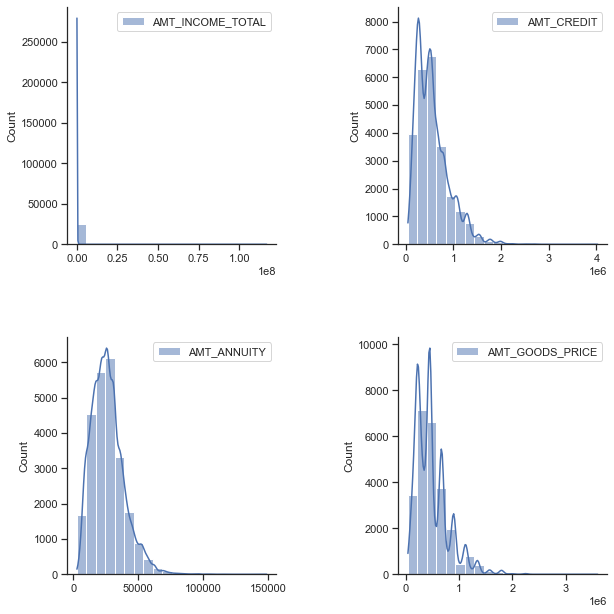

In [114]:
fig, axes = plt.subplots(2, 2,figsize=(10,10))

for item,ax in zip(list_numerical,axes.flatten()):
    
    sns.histplot(data=cred1[(cred1.TARGET==1)][[item]],kde=True,bins=20,ax=ax)
    
fig.tight_layout(pad=5.0)
plt.show()


# INSIGHTS

#### - Those who are non defaulters have an varying income range as compared to defaulters. 
#### - Dist. plot clearly shows that the shape in Income total, Annuity, Credit and Good Price are similar for defaulters and non defaulters.

# 

# 

### BIVARIATE ANALYSIS OF NUMERICAL VS CATEGORICAL AND NUMERICAL VS NUMERICAL######

In [109]:
def p75(x):
    return np.quantile(x, 0.75)
def p25(x):
    return np.quantile(x,0.25)

<Figure size 432x432 with 0 Axes>

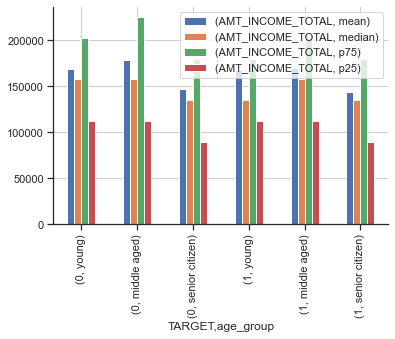

In [110]:
plt.figure(figsize=(6,6))
cred1.groupby(by=["TARGET","age_group"])[["AMT_INCOME_TOTAL"]].aggregate(["mean","median",p75,p25]).plot.bar()
plt.legend(loc="best")
plt.grid()
plt.show()

#### MIDDLE AGED PEOPLE HAS HIGHER INCOMES. WE HAVE DONE THIS FOR AMT_ANNUAL AS THERE ARE SOME OUTLIERS PRESENT IN IT THUS FOR ALL PERCENTILES WE ARE PLOTTING TO GET A GOOD VIEW 

In [111]:
list_categorical_analysis

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'age_group',
 'Income_Range',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS']

# 

### BIVARIATE ANALYSIS OF AMT_CREDIT AND AMT_INCOME_TOTAL and AMT_CREDIT

##### FOR NON DEFAULTERS

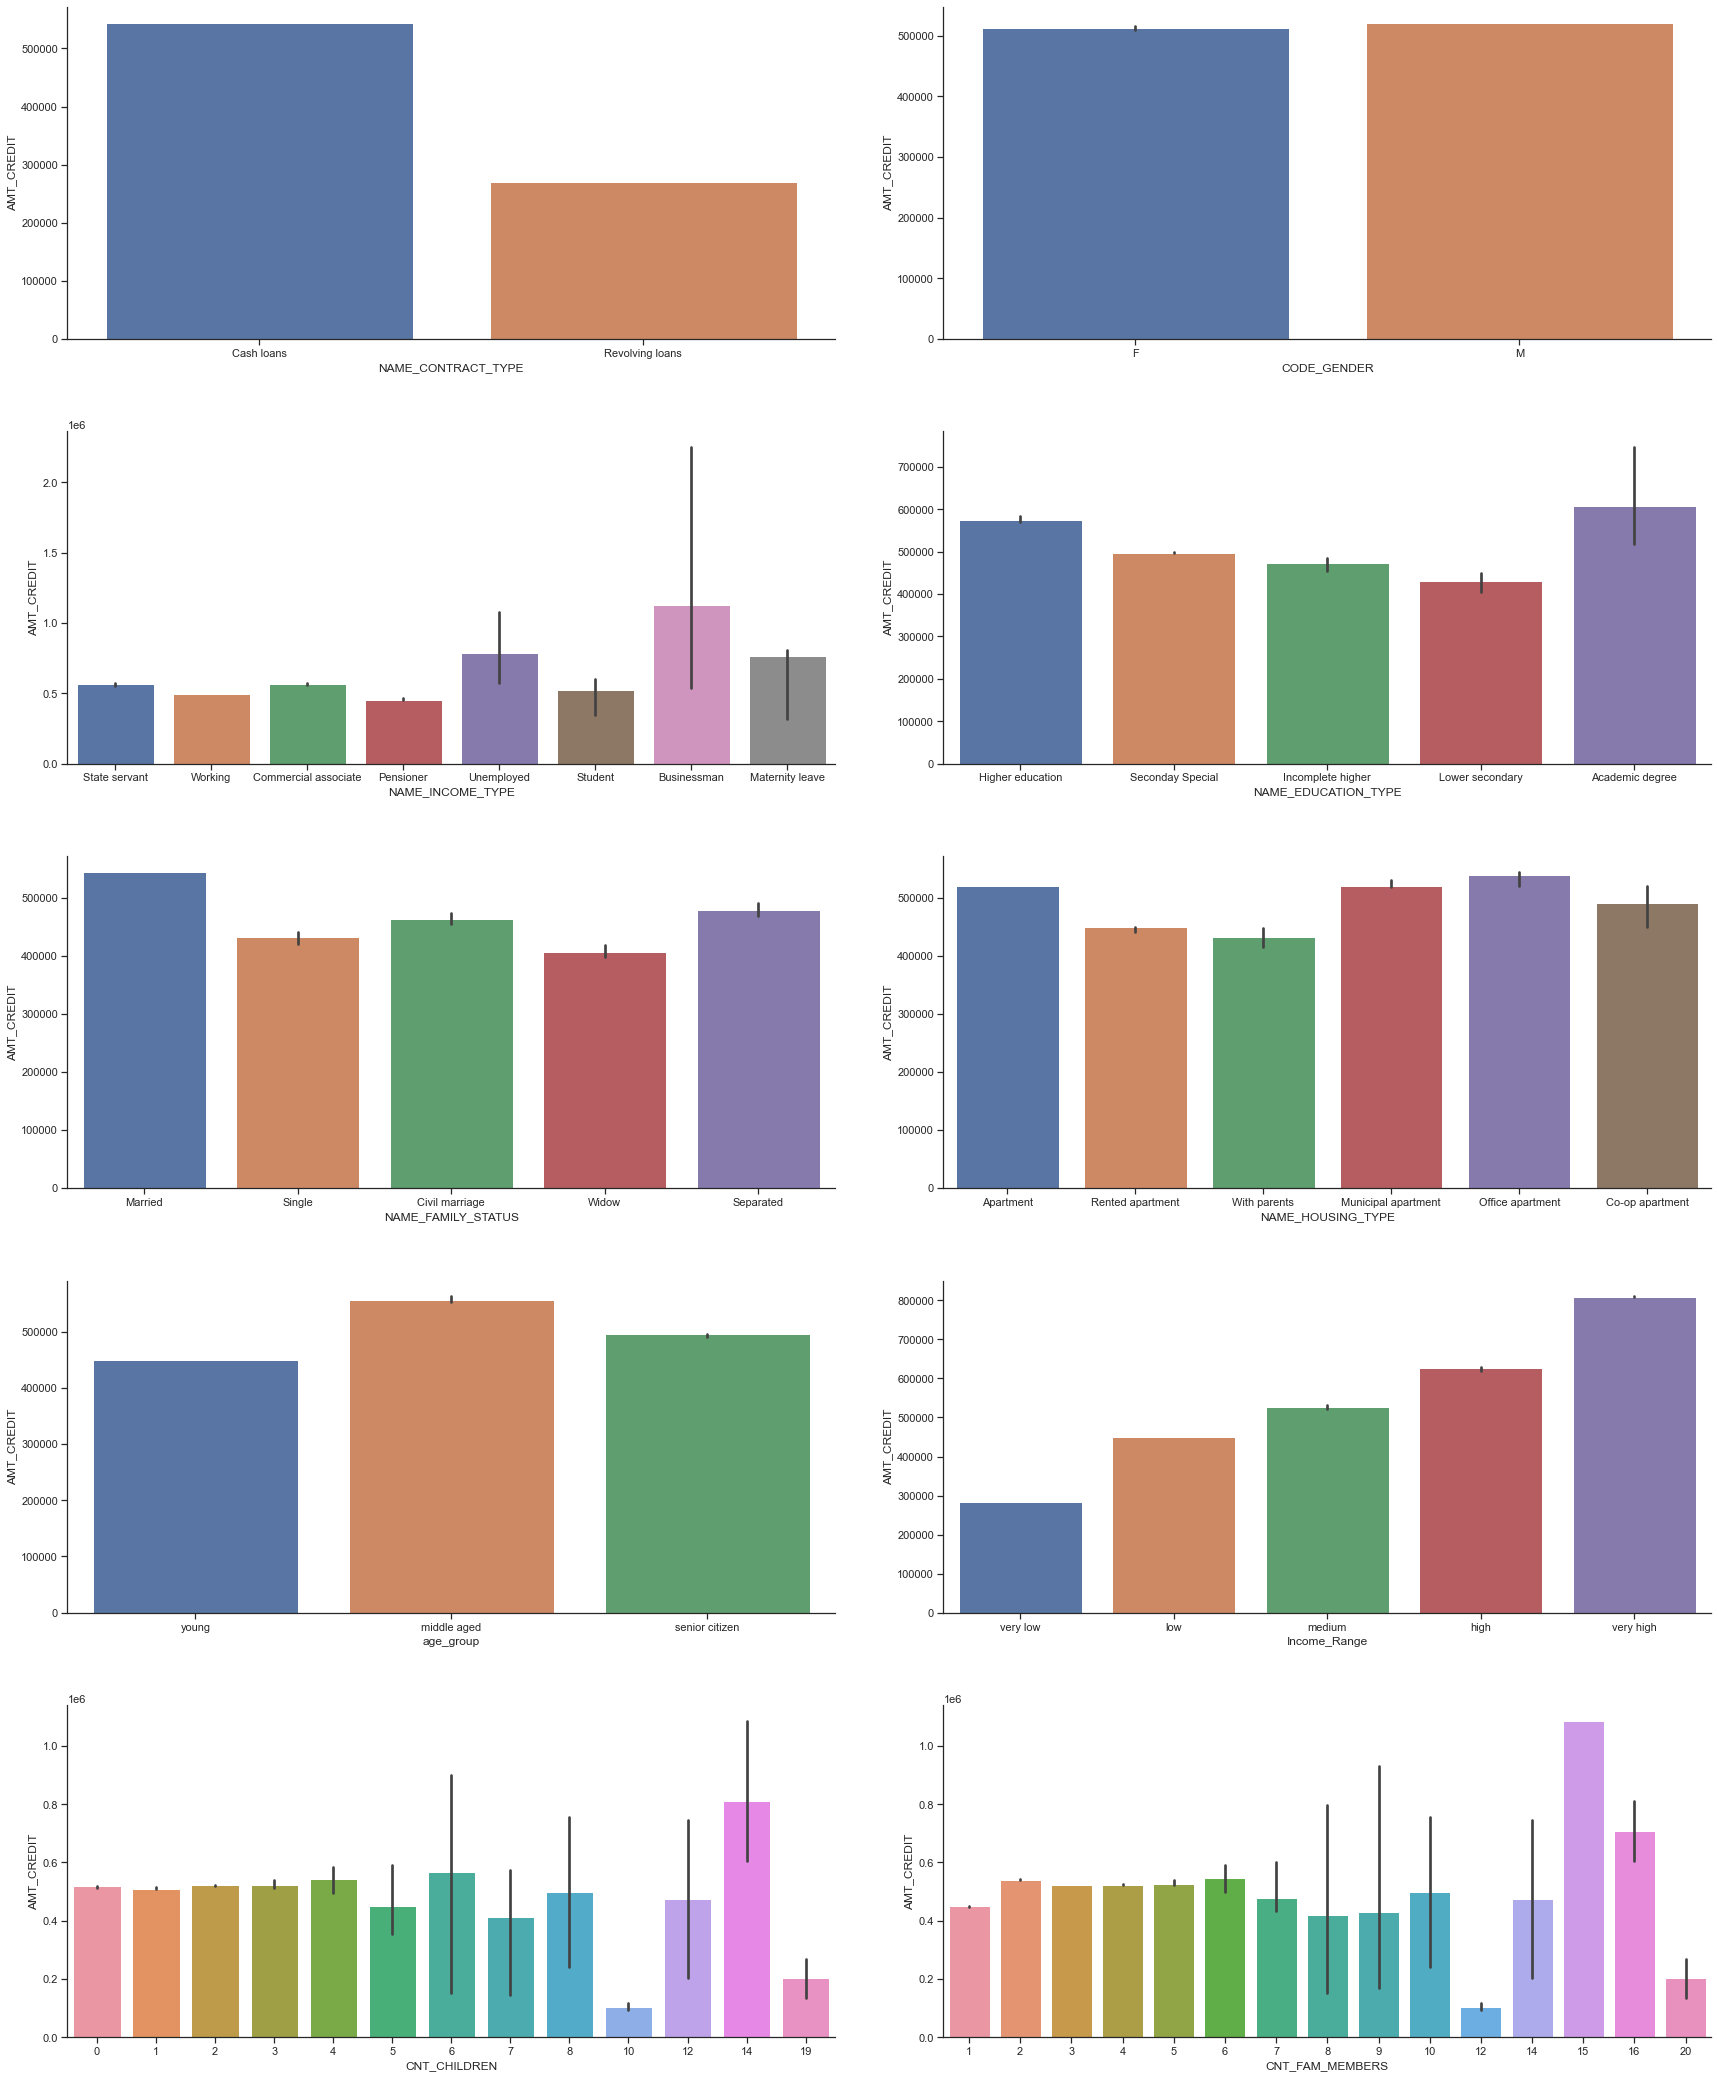

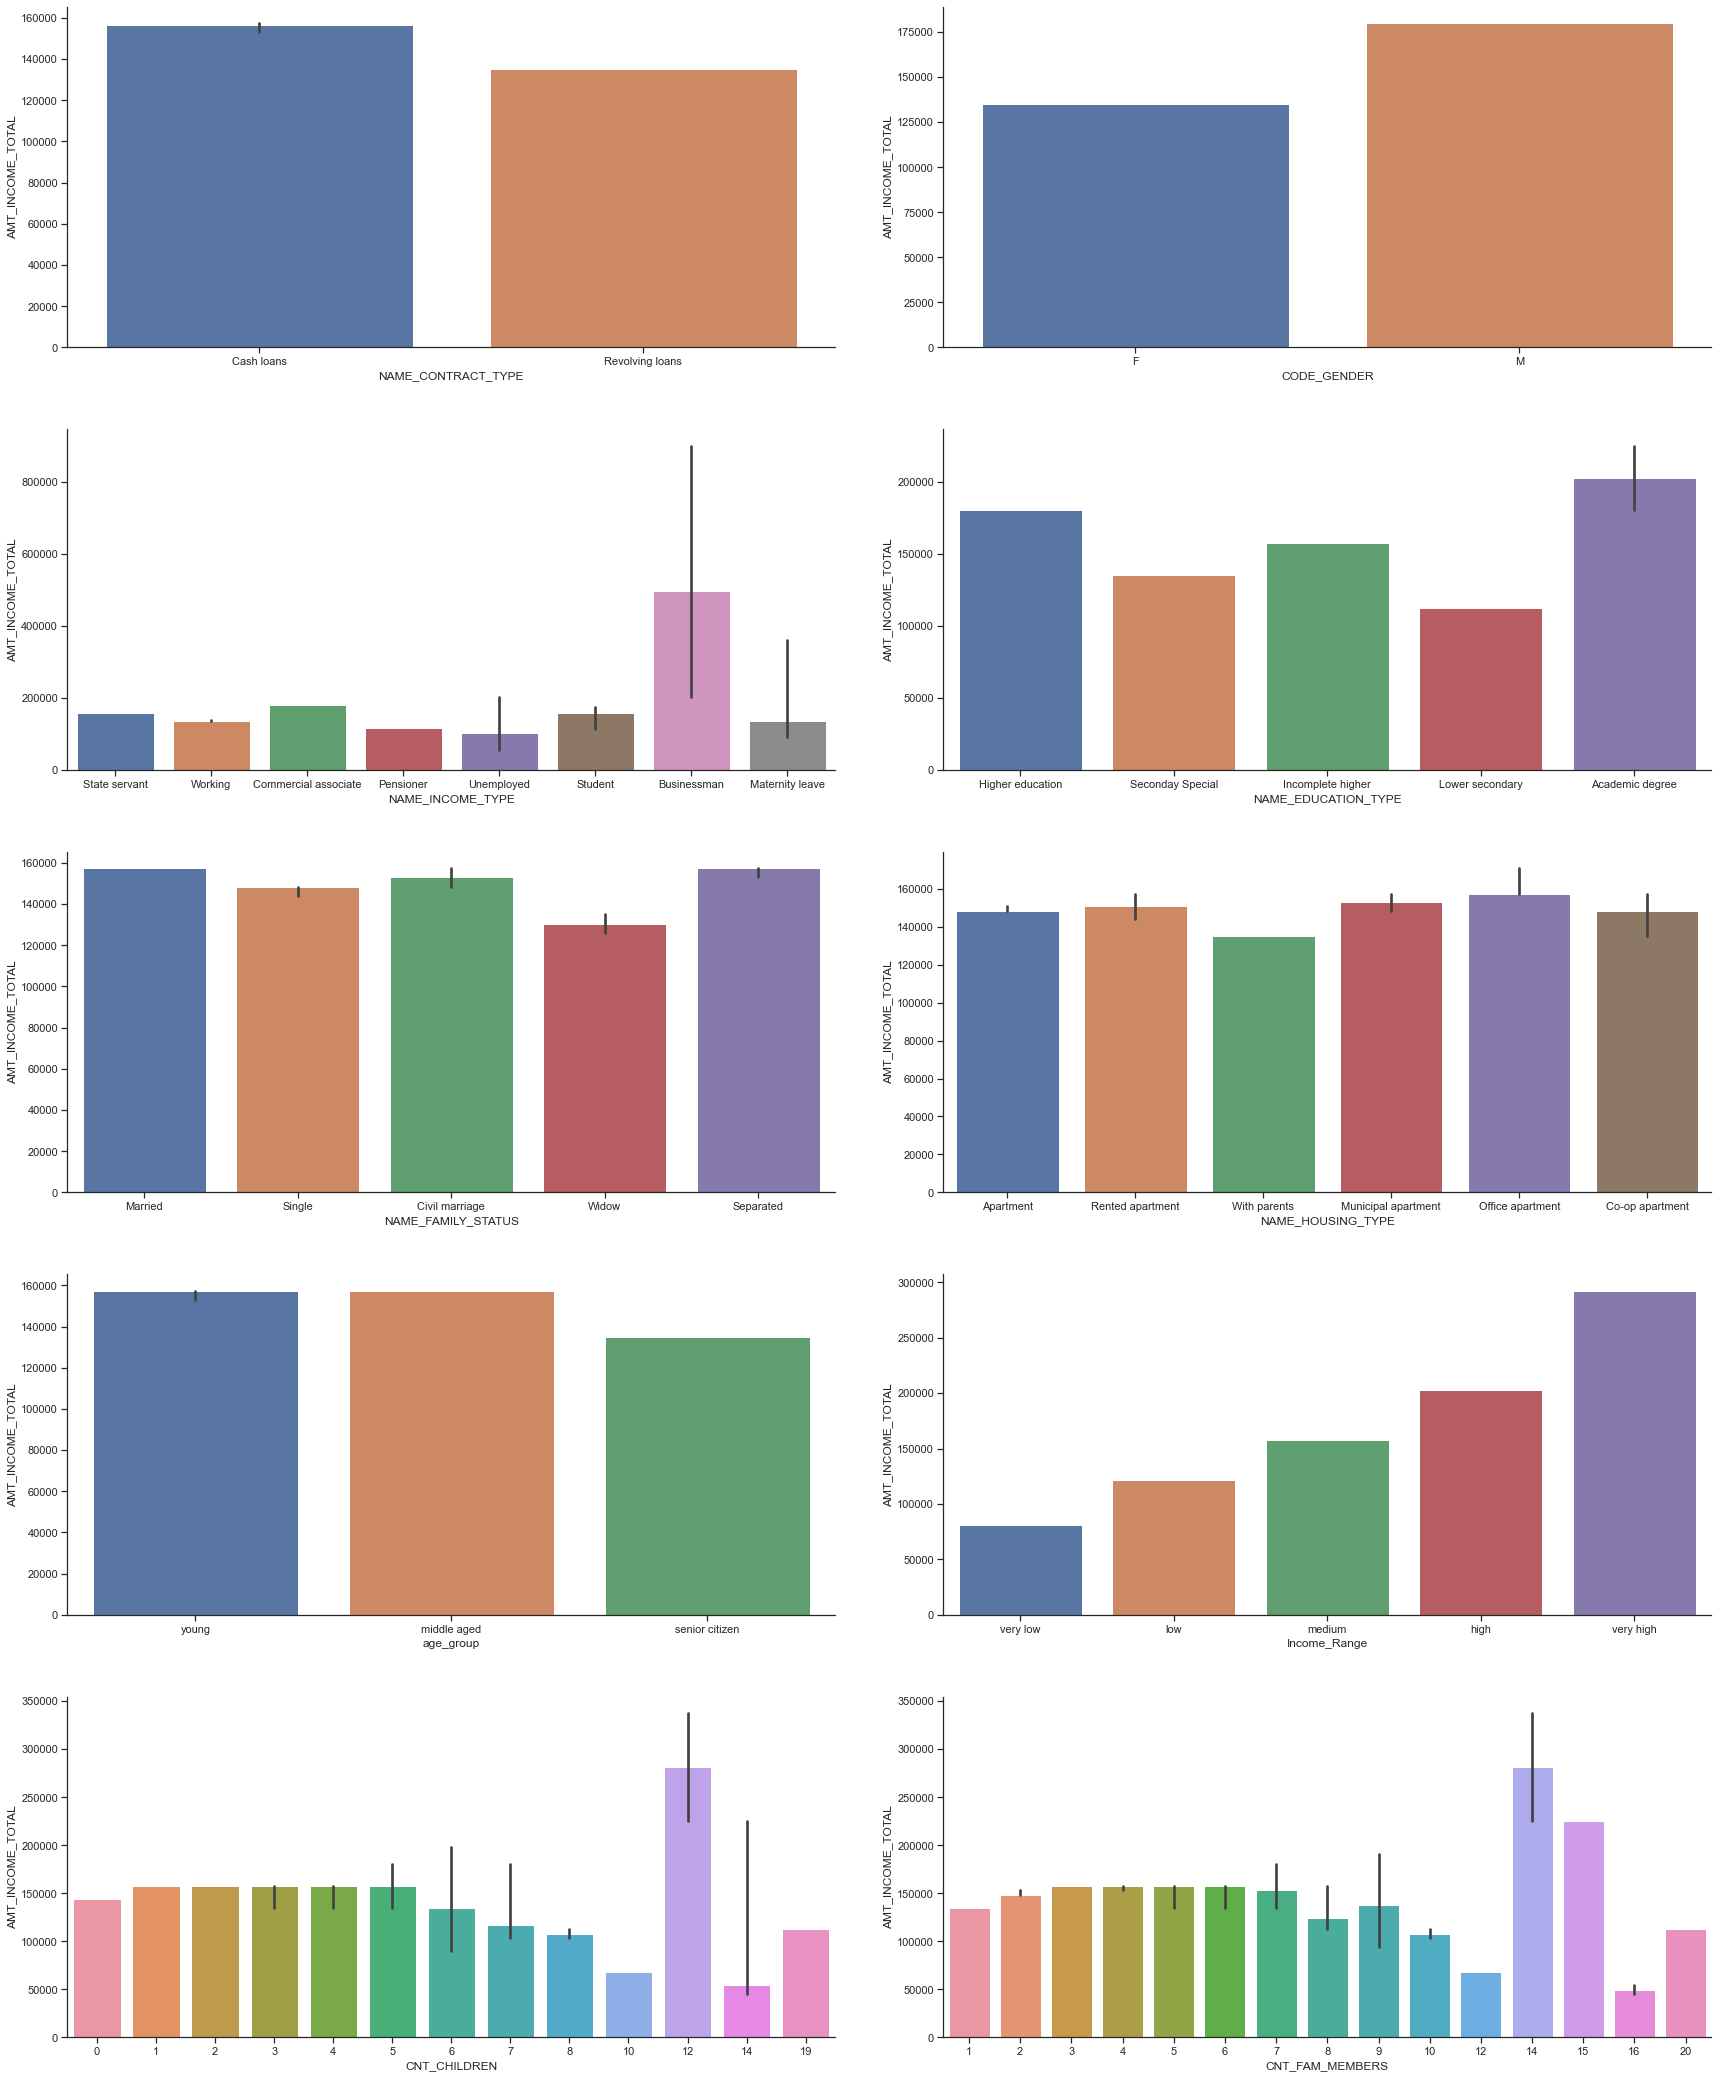

In [112]:
## Taking median values for AMT_CREDIT and AMT_INCOME as there are some outliers in them.

def bivariate_1(y):
    
    fig, axes = plt.subplots(5, 2,figsize=(25,30))

    for item,ax in zip(list_categorical_analysis,axes.flatten()):
        
    
    
          sns.barplot(data=cred1[cred1.TARGET==0],x=item,y=y,estimator=(lambda x:np.percentile(x,50)),ax=ax)
        
    fig.tight_layout(pad=4.0)
    plt.show()


for i in ["AMT_CREDIT","AMT_INCOME_TOTAL"]:
    
    bivariate_1(i)
                
                

    
    
    

# Insights

## AMT_CREDIT vs Rest 
#### For non defaulters the people are taking more cash loans and the amount of those loans are high as can be seen from the plot AMT_CREDIT type vs NAME_CONTRACT_TYPE
#### Male are taking more amount as high as 6 lacs or more than Female
#### Buisness man are taking loans of higher amount which is evident because they are taking loans for buisness setup.
#### People with Academic degree and Higher education are taking higher loan amounts , which means higher education/ Academic degree requires lot of money.
#### Married people and those who are middle aged as evident from previous are the highest loan takers and the amount of loan they take is the highest
#### Those having more children and more family members are taking loan of huge amount this is quite an interesting theory
#### These are few insights I could gather 
#### We will keep analysing more for more insights so that we can finally allow the people who should be given loan and those who should not be


# 

# AMT_INCOME vs REST
#### People are taking more cash loans with high income
#### Male are having higher income when compared to female's income.
#### Bussiness men are having maximum income which is also evident from the fact that they run independent buisness
#### Those  with  academic degree are having more income.
#### One Interesting thing is said people who are married and seperated have highest incomes.
#### While people having more children and more family incomes have higher family incomes but they are very few in nos.Mostly people with 2 family members and less or no children are having highest count as fro previous analysis.


#### Thus for non defaulters Married couples with 0 or nochildren who are in their middle age and have low to high income range are taking loans and also repaying them. And also there are some cases where we have found outliers but they cannot be disregarded as they are though few in nos can be a potential candidate.



# For Defaulters 

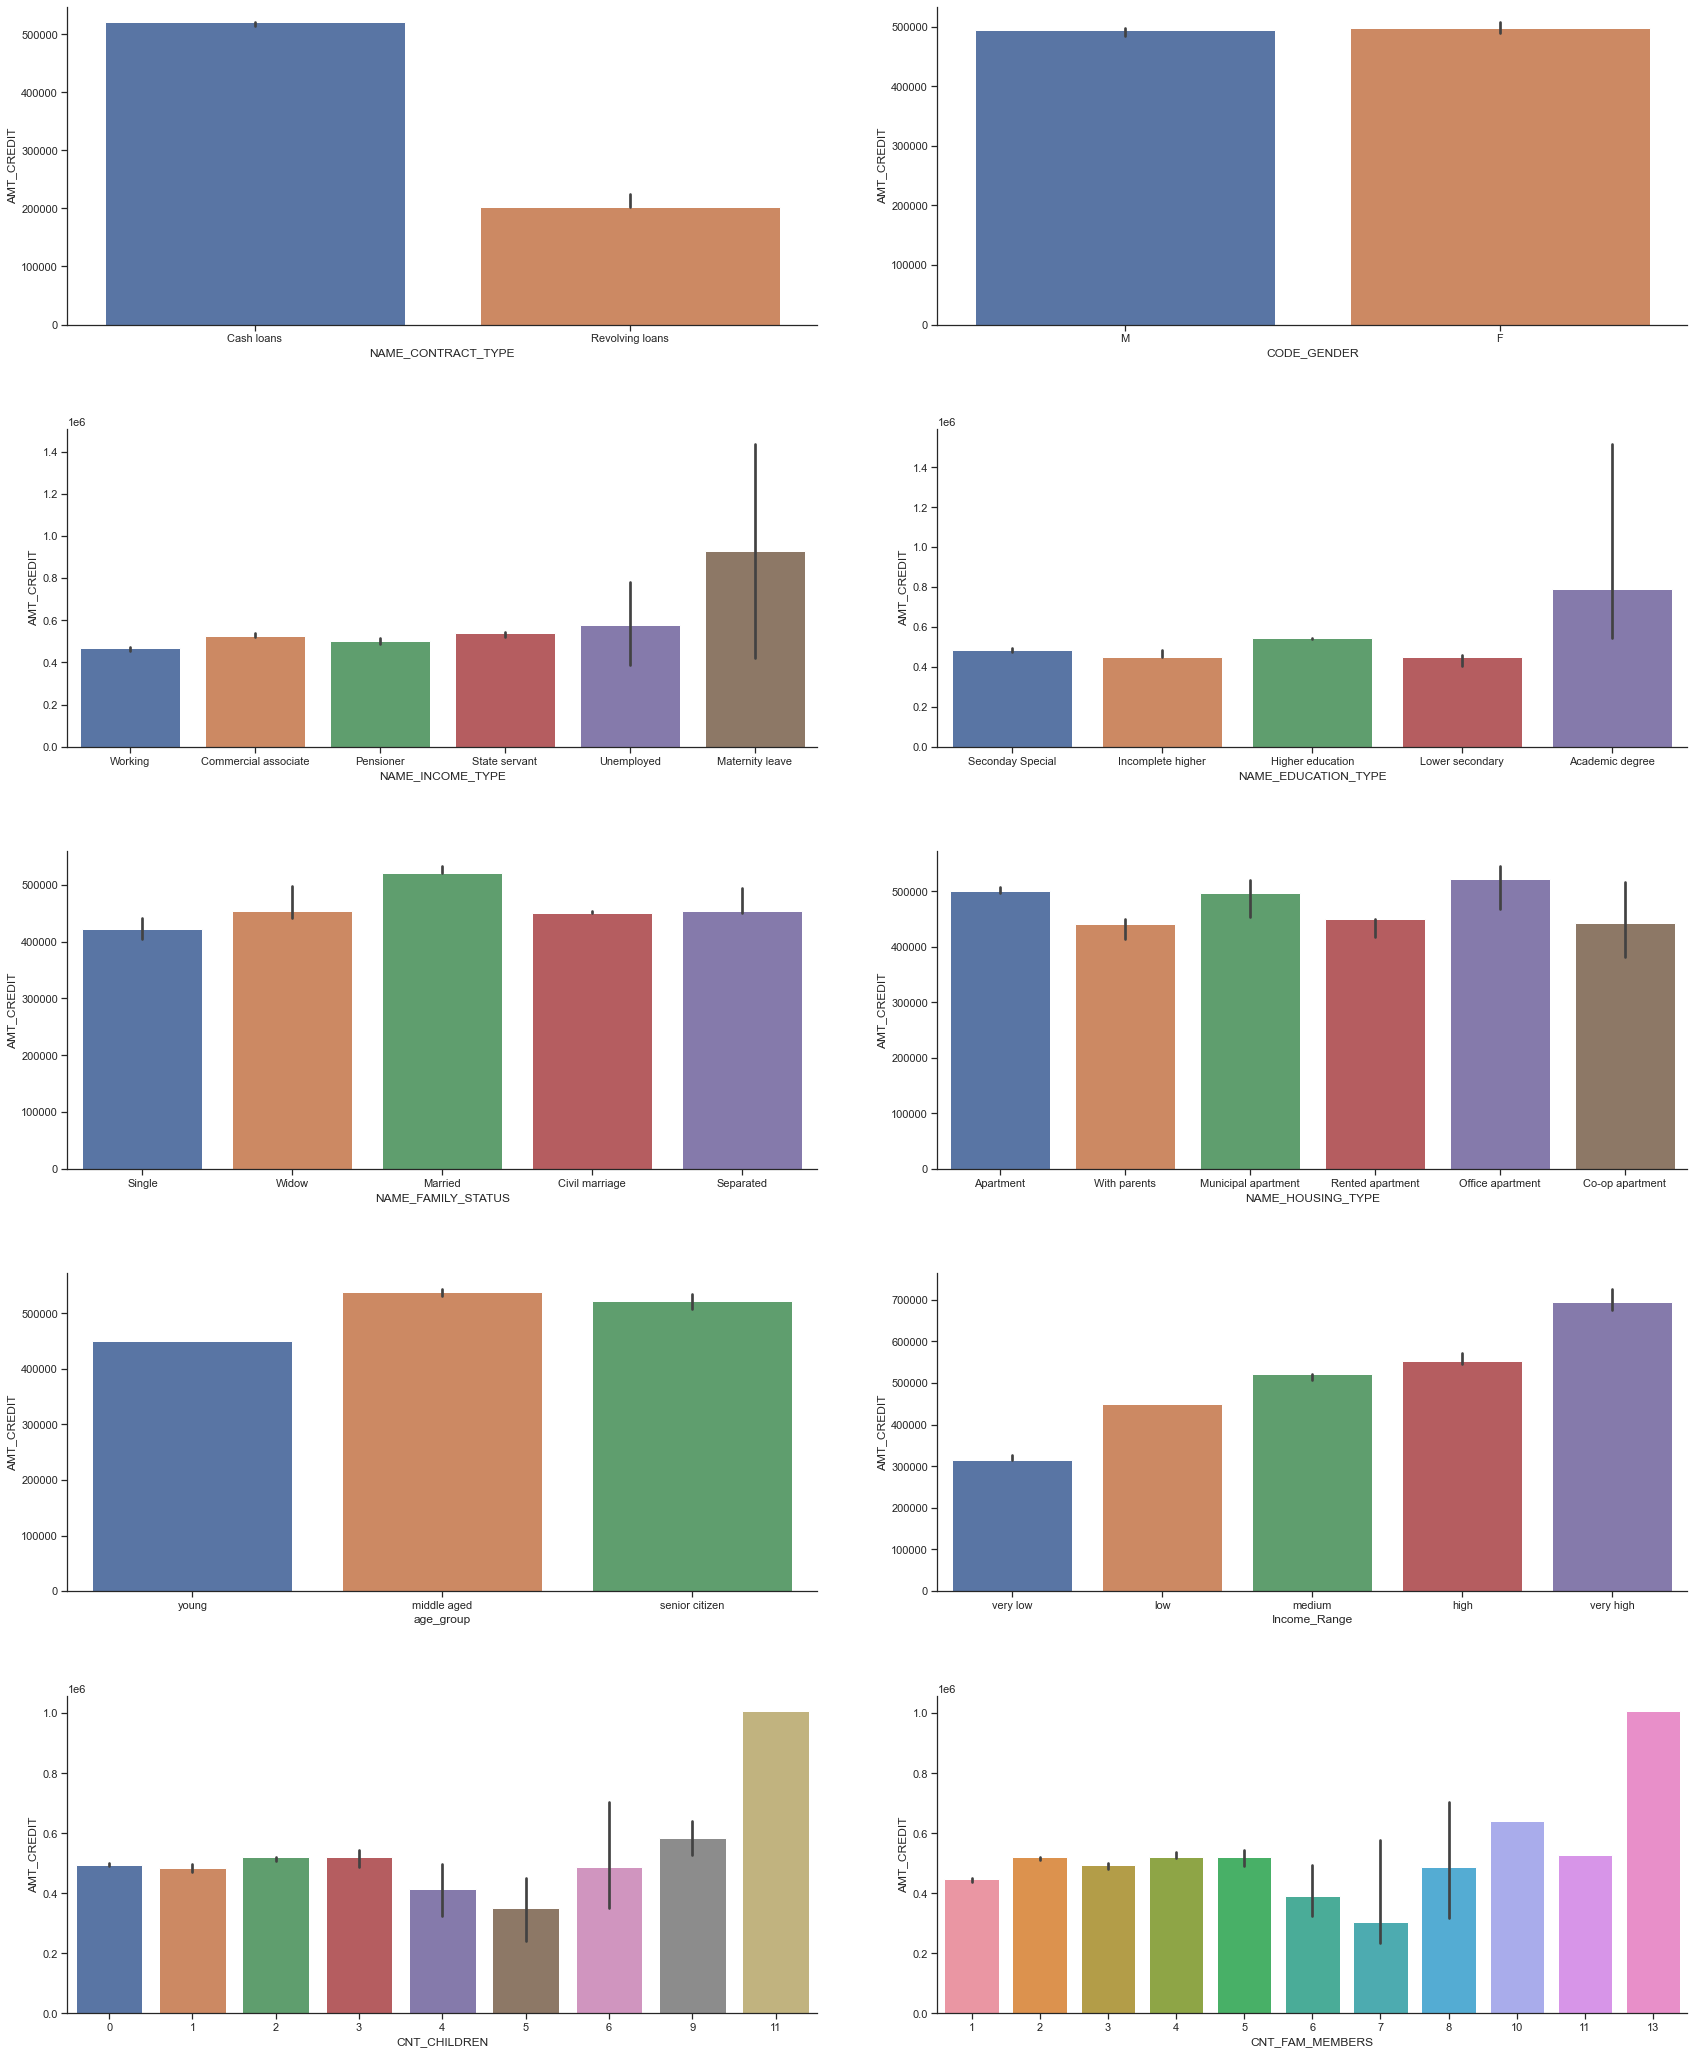

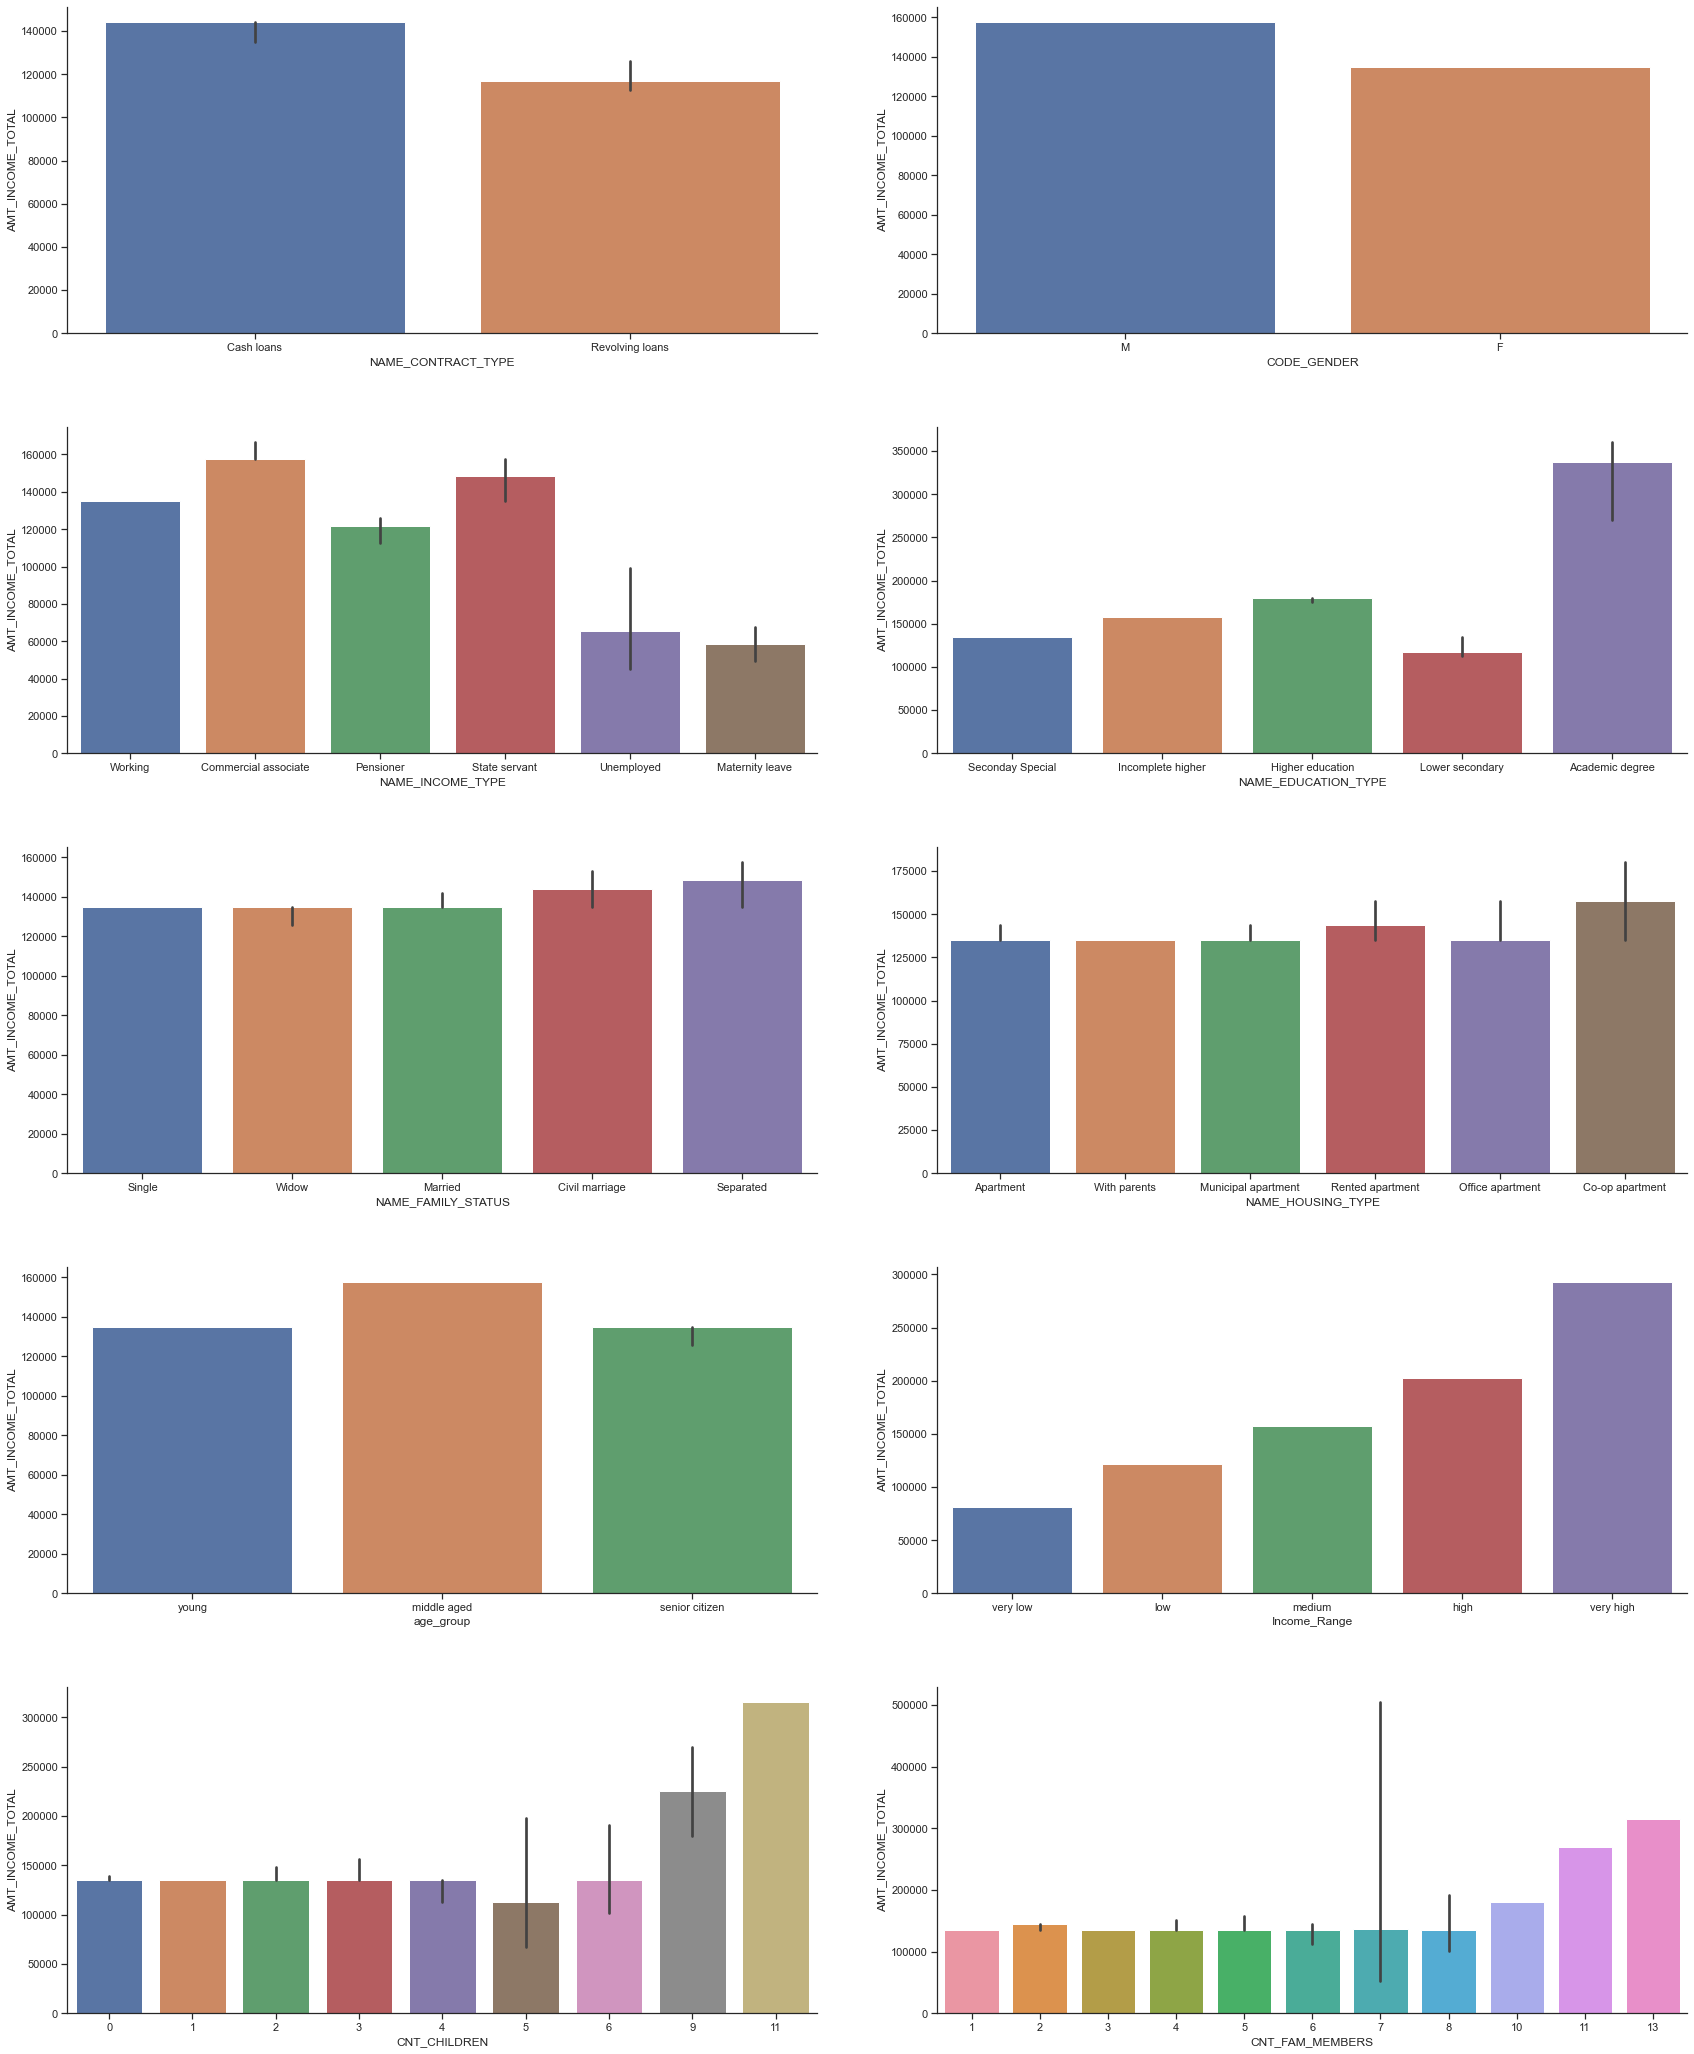

In [114]:
def bivariate_2(y):
    
    fig, axes = plt.subplots(5, 2,figsize=(25,30))

    for item,ax in zip(list_categorical_analysis,axes.flatten()):
        
    
    
          sns.barplot(data=cred1[cred1.TARGET==1],x=item,y=y,estimator=(lambda x:np.percentile(x,50)),ax=ax)
        
    fig.tight_layout(pad=5.0)
    plt.show()


for i in ["AMT_CREDIT","AMT_INCOME_TOTAL"]:
    
    bivariate_2(i)
                

# AMT_CREDIT vs Rest

### Well everything is very similar except that Those with Maternity_leave have high tendency of taking big amount loans and not returning them on time.

# 

# AMT_INCOME vs REST

### ALmost everything is similar in this case also only notable thing is People from various income types  are turning out to be defaulters.


# 

# 

### Next starting with Multi Variate Analysis 

# 

#   HEAT MAPS  #######


In [115]:
cred1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  int64   
 5   FLAG_OWN_REALTY              307511 non-null  int64   
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307511 non-null  float64 
 10  AMT_GOODS_PRICE              307511 non-null  float64 
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [116]:
cred1.TARGET.mean()

0.08072881945686496

In [117]:
pivot1= pd.pivot_table(data = cred1, values='TARGET', index=['CODE_GENDER','age_group'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

pivot1

NAME_EDUCATION_TYPE         Academic degree  Higher education  \
CODE_GENDER age_group                                           
F           young                  0.115385          0.059127   
            middle aged            0.000000          0.044641   
            senior citizen         0.000000          0.034412   
M           young                  0.000000          0.070188   
            middle aged            0.000000          0.061767   
            senior citizen         0.000000          0.051188   

NAME_EDUCATION_TYPE         Incomplete higher  Lower secondary  \
CODE_GENDER age_group                                            
F           young                    0.092009         0.198370   
            middle aged              0.063608         0.101717   
            senior citizen           0.042607         0.053963   
M           young                    0.097561         0.149590   
            middle aged              0.083832         0.139571   
            senior citizen           0.062893         0.106849   

NAME_EDUCATION_TYPE         Seconday Special  
CODE_GENDER age_group                         
F           young                   0.124131  
            middle aged             0.072160  
            senior citizen          0.048173  
M           young                   0.141163  
            middle aged             0.105746  
            senior citizen          0.076638

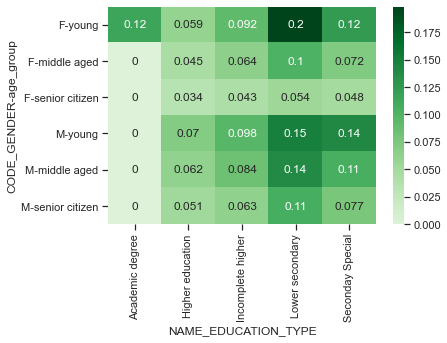

In [118]:
sns.heatmap(pivot1,cmap="Greens",annot=True,center=0.08072881945686496)
plt.show()

### INSIGHTS

#### Well Academic Degree candidates are the least among non defaulters.
#### Female Young candidates with lower secondary education are most likely to dafult
#### While Male candidates of Lower secondary and secondary special education has higher defaulters.



In [119]:
pivot2= pd.pivot_table(data = cred1, values='TARGET', index=['CODE_GENDER','age_group'],
                      columns=['Income_Range'], aggfunc=np.mean)

pivot2

Income_Range                very low       low    medium      high  very high
CODE_GENDER age_group                                                        
F           young           0.114525  0.104011  0.102361  0.084363   0.075410
            middle aged     0.070137  0.066736  0.069538  0.065829   0.053566
            senior citizen  0.045798  0.047162  0.050773  0.043973   0.041704
M           young           0.149389  0.137856  0.132786  0.115805   0.079710
            middle aged     0.118638  0.107742  0.104954  0.093514   0.075049
            senior citizen  0.074495  0.080860  0.058665  0.076214   0.053926

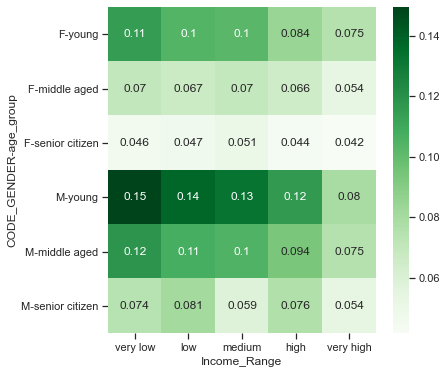

In [120]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot2,cmap="Greens",annot=True)
plt.show()

# INSIGHTS

#### Middle aged and Young males having income in the range of very low to high have the most chances to default.
#### Also Young Females are most among defaulters. 
#### Thus Male candidates are not great in case of returning money in time and thus have higher tendency of becoming defaulter


In [121]:
pivot3= pd.pivot_table(data = cred1, values='TARGET', index=['CODE_GENDER','age_group'],
                      columns=['NAME_CONTRACT_TYPE'], aggfunc=np.mean)

pivot3

NAME_CONTRACT_TYPE          Cash loans  Revolving loans
CODE_GENDER age_group                                  
F           young             0.103564         0.073969
            middle aged       0.067886         0.044000
            senior citizen    0.047134         0.029632
M           young             0.125050         0.071429
            middle aged       0.100563         0.049072
            senior citizen    0.073501         0.050573

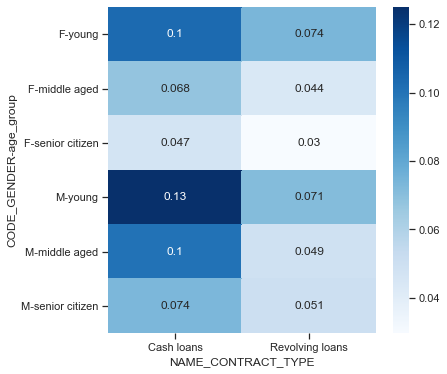

In [122]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot3,cmap="Blues",annot=True)
plt.show()

#### Those taking cash loans has a higher tendency to default and males are as usual on the top followed by Female.


In [123]:
pivot4= pd.pivot_table(data = cred1, values='TARGET', index=['CODE_GENDER','age_group'],
                      columns=['OCCUPATION_TYPE'], aggfunc=np.mean)

pivot4

OCCUPATION_TYPE             Accountants  Cleaning staff  Cooking staff  \
CODE_GENDER age_group                                                    
F           young              0.060948        0.173693       0.157182   
            middle aged        0.040967        0.088790       0.085470   
            senior citizen     0.034884        0.059850       0.046099   
M           young              0.082192        0.131868       0.127072   
            middle aged        0.039683        0.112360       0.102151   
            senior citizen     0.000000        0.071429       0.076923   

OCCUPATION_TYPE             Core staff   Drivers  HR staff  \
CODE_GENDER age_group                                        
F           young             0.074419  0.113402  0.079646   
            middle aged       0.051205  0.073379  0.054475   
            senior citizen    0.026446  0.041667  0.024390   
M           young             0.084610  0.133180  0.136364   
            middle aged       0.067364  0.108118  0.000000   
            senior citizen    0.045113  0.089552  0.000000   

OCCUPATION_TYPE             High skill tech staff  IT staff  Laborers  \
CODE_GENDER age_group                                                   
F           young                        0.078638  0.095890  0.122420   
            middle aged                  0.056666  0.043478  0.078137   
            senior citizen               0.042514  0.000000  0.036697   
M           young                        0.064846  0.070588  0.136943   
            middle aged                  0.057436  0.055556  0.107287   
            senior citizen               0.031056  0.000000  0.078828   

OCCUPATION_TYPE             Low-skill Laborers  Managers  Medicine staff  \
CODE_GENDER age_group                                                      
F           young                     0.159091  0.085163        0.097674   
            middle aged               0.151111  0.045689        0.056519   
            senior citizen            0.125000  0.034565        0.044586   
M           young                     0.198492  0.079438        0.076923   
            middle aged               0.159142  0.067066        0.125984   
            senior citizen            0.122222  0.060563        0.000000   

OCCUPATION_TYPE             Pensioner  Private service staff  Realty agents  \
CODE_GENDER age_group                                                         
F           young            0.092784               0.089286       0.093851   
            middle aged      0.057219               0.052055       0.050847   
            senior citizen   0.047900               0.014286       0.038462   
M           young            0.187970               0.072727       0.307692   
            middle aged      0.084165               0.076923       0.088235   
            senior citizen   0.067859               0.000000       0.000000   

OCCUPATION_TYPE             Sales staff  Secretaries  Security staff  \
CODE_GENDER age_group                                                  
F           young              0.124114     0.072391        0.187739   
            middle aged        0.080197     0.071304        0.095103   
            senior citizen     0.049661     0.000000        0.038043   
M           young              0.096798     0.181818        0.147009   
            middle aged        0.087735     0.121212        0.100470   
            senior citizen     0.122807     0.000000        0.100536   

OCCUPATION_TYPE             Waiters/barmen staff   missing  
CODE_GENDER age_group                                       
F           young                       0.141925  0.086813  
            middle aged                 0.093204  0.064814  
            senior citizen              0.018519  0.037140  
M           young                       0.110294  0.119117  
            middle aged                 0.033333  0.091412  
            senior citizen                   NaN  0.066502

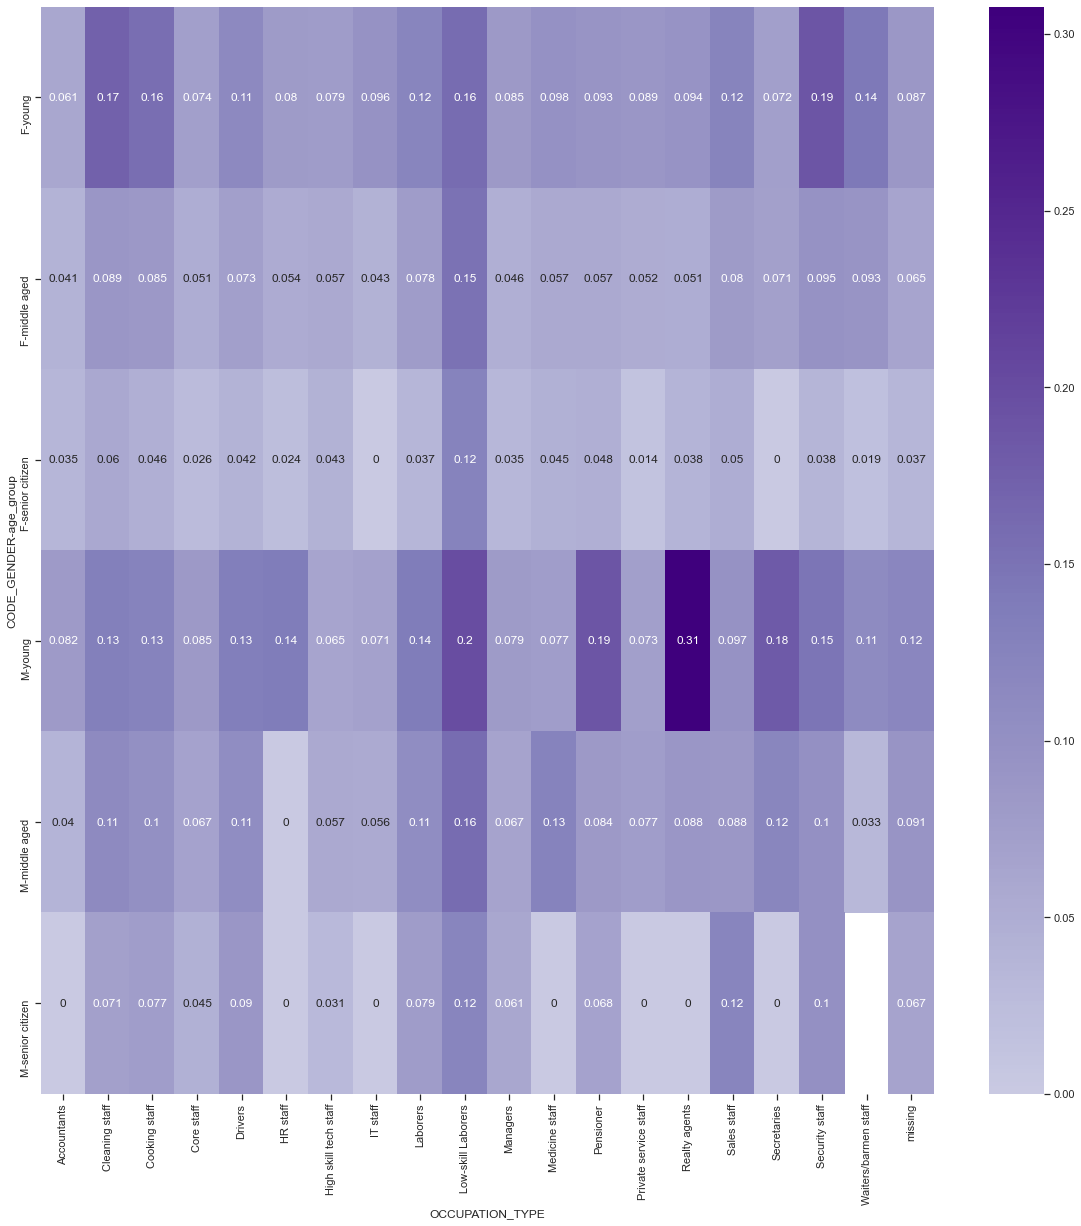

In [124]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot4,cmap="Purples",annot=True,center=0.081)
plt.show()

## INSIGHTS
### Realty agents, Pensioners, Lower_Skilled Labourers have high tendency to become defaulters for middle aged and young male and 
### Security Staff Young Females also show higher tendency of becoming defaulters.


In [125]:
pivot5= pd.pivot_table(data = cred1, values='TARGET', index=['CODE_GENDER','age_group','Income_Range'],
                      columns=['NAME_FAMILY_STATUS'], aggfunc=np.mean)

pivot5

NAME_FAMILY_STATUS                       Civil marriage   Married  Separated  \
CODE_GENDER age_group      Income_Range                                        
F           young          very low            0.122344  0.112254   0.106426   
                           low                 0.112268  0.102410   0.120585   
                           medium              0.111111  0.098348   0.103093   
                           high                0.099738  0.083687   0.070470   
                           very high           0.086370  0.072874   0.070028   
            middle aged    very low            0.085324  0.068418   0.067477   
                           low                 0.081652  0.062941   0.070575   
                           medium              0.086891  0.063054   0.069418   
                           high                0.074005  0.061760   0.067969   
                           very high           0.054720  0.052272   0.061475   
            senior citizen very low            0.048135  0.043663   0.046703   
                           low                 0.052632  0.042387   0.040404   
                           medium              0.061972  0.048913   0.076355   
                           high                0.047377  0.039474   0.044000   
                           very high           0.082317  0.037209   0.043280   
M           young          very low            0.179625  0.138225   0.157895   
                           low                 0.140756  0.125184   0.230483   
                           medium              0.137787  0.125998   0.181208   
                           high                0.148524  0.103271   0.126471   
                           very high           0.104089  0.069848   0.124424   
            middle aged    very low            0.142857  0.104789   0.122257   
                           low                 0.140496  0.096502   0.127055   
                           medium              0.163158  0.088802   0.126667   
                           high                0.145509  0.082559   0.133175   
                           very high           0.105809  0.067916   0.102649   
            senior citizen very low            0.070796  0.065832   0.139344   
                           low                 0.101961  0.071992   0.144000   
                           medium              0.094118  0.052805   0.100000   
                           high                0.075269  0.069661   0.134921   
                           very high           0.099291  0.048527   0.096386   

NAME_FAMILY_STATUS                         Single     Widow  
CODE_GENDER age_group      Income_Range                      
F           young          very low      0.120477  0.065217  
                           low           0.100525  0.075949  
                           medium        0.106509  0.139535  
                           high          0.079856  0.074627  
                           very high     0.076222  0.111111  
            middle aged    very low      0.077353  0.056228  
                           low           0.072064  0.062715  
                           medium        0.087950  0.064572  
                           high          0.075265  0.068933  
                           very high     0.054068  0.048043  
            senior citizen very low      0.045505  0.050196  
                           low           0.060731  0.051543  
                           medium        0.046368  0.044818  
                           high          0.040175  0.058049  
                           very high     0.037523  0.040208  
M           young          very low      0.155452  0.000000  
                           low           0.149683  0.166667  
                           medium        0.139959  0.000000  
                           high          0.132614  0.444444  
                           very high     0.095319  0.333333  
            middle aged    very low      0.171296  0.109091  
             

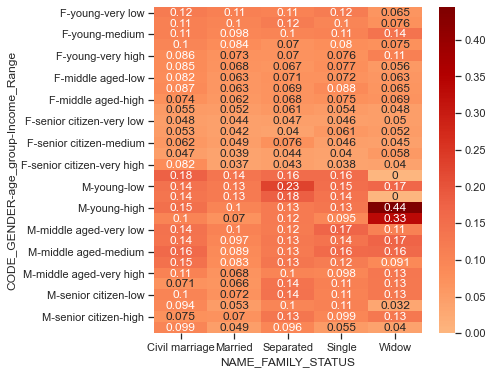

In [126]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot5,cmap="OrRd",annot=True,center=0.081)
plt.show()

### We can see some interesting insights here male young with high to very high income and those who are widow have a greater tendency to default.
### Also single people and those who have civil marriage have a higher tendency to default mostly in case of males.

In [127]:
pivot6= pd.pivot_table(data = cred1, values='TARGET', index=['Income_Range','age_group'],
                      columns=['NAME_HOUSING_TYPE'], aggfunc=np.mean)

pivot6

NAME_HOUSING_TYPE            Apartment  Co-op apartment  Municipal apartment  \
Income_Range age_group                                                         
very low     young            0.117345         0.120879             0.140312   
             middle aged      0.078091         0.050633             0.091845   
             senior citizen   0.050588         0.025000             0.060241   
low          young            0.114466         0.105263             0.136620   
             middle aged      0.076704         0.034483             0.087846   
             senior citizen   0.054085         0.025641             0.053834   
medium       young            0.112441         0.150000             0.138264   
             middle aged      0.079975         0.037736             0.081395   
             senior citizen   0.052003         0.000000             0.053640   
high         young            0.099227         0.118519             0.103896   
             middle aged      0.076311         0.042553             0.065258   
             senior citizen   0.051112         0.052632             0.082515   
very high    young            0.077166         0.061538             0.095465   
             middle aged      0.062294         0.132530             0.074343   
             senior citizen   0.045587         0.058824             0.040984   

NAME_HOUSING_TYPE            Office apartment  Rented apartment  With parents  
Income_Range age_group                                                         
very low     young                   0.080247          0.132890      0.142387  
             middle aged             0.069767          0.119403      0.093137  
             senior citizen          0.048077          0.076923      0.073171  
low          young                   0.107759          0.128386      0.122911  
             middle aged             0.080906          0.131579      0.115672  
             senior citizen          0.085106          0.086420      0.040000  
medium       young                   0.079545          0.127907      0.131659  
             middle aged             0.035714          0.135678      0.127098  
             senior citizen          0.073171          0.166667      0.055556  
high         young                   0.072727          0.130618      0.106109  
             middle aged             0.080119          0.140496      0.108460  
             senior citizen          0.052083          0.116279      0.033333  
very high    young                   0.032864          0.081325      0.087032  
             middle aged             0.025806          0.094286      0.098696  
             senior citizen          0.045455          0.058824      0.080000

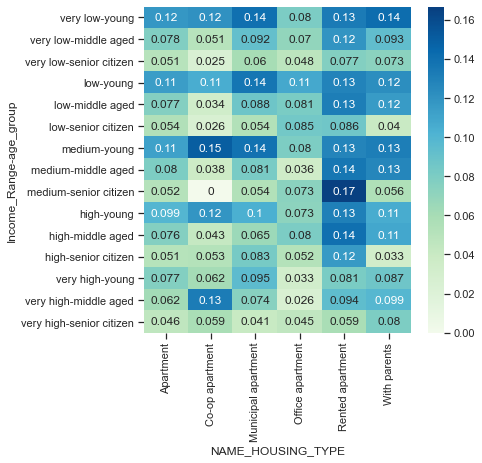

In [128]:
plt.figure(figsize=(6,6))
sns.heatmap(pivot6,cmap="GnBu",annot=True,center=0.081)
plt.show()

### Well we can see that most of the people who live in rented apartments have the greatest chance to become defaulters 

In [129]:
pivot7= pd.pivot_table(data = cred1, values='TARGET', index=['CODE_GENDER','age_group','Income_Range'],
                      columns=['NAME_EDUCATION_TYPE'], aggfunc=np.mean)

pivot7

NAME_EDUCATION_TYPE                      Academic degree  Higher education  \
CODE_GENDER age_group      Income_Range                                      
F           young          very low             0.000000          0.067722   
                           low                  0.000000          0.060234   
                           medium               0.000000          0.061638   
                           high                 0.000000          0.056889   
                           very high            0.428571          0.050937   
            middle aged    very low             0.000000          0.050897   
                           low                  0.000000          0.043313   
                           medium               0.000000          0.051441   
                           high                 0.000000          0.047674   
                           very high            0.000000          0.037142   
            senior citizen very low             0.000000          0.040928   
                           low                  0.000000          0.032804   
                           medium               0.000000          0.039906   
                           high                 0.000000          0.032226   
                           very high            0.000000          0.030070   
M           young          very low             0.000000          0.093596   
                           low                  0.000000          0.076020   
                           medium               0.000000          0.083412   
                           high                 0.000000          0.077171   
                           very high            0.000000          0.053294   
            middle aged    very low             0.000000          0.089372   
                           low                  0.000000          0.076585   
                           medium               0.000000          0.077367   
                           high                 0.000000          0.061404   
                           very high            0.000000          0.052092   
            senior citizen very low                  NaN          0.054441   
                           low                  0.000000          0.063492   
                           medium               0.000000          0.035088   
                           high                 0.000000          0.063584   
                           very high            0.000000          0.035753   

NAME_EDUCATION_TYPE                      Incomplete higher  Lower secondary  \
CODE_GENDER age_group      Income_Range                                       
F           young          very low               0.096525         0.197080   
                           low                    0.091743         0.256198   
                           medium                 0.102467         0.153846   
                           high                   0.078665         0.137931   
                           very high              0.098280         0.076923   
            middle aged    very low               0.068493         0.094203   
                           low                    0.054656         0.108000   
                           medium                 0.086124         0.151515   
                           high                   0.060721         0.098361   
                           very high              0.063131         0.046512   
            senior citizen very low               0.060000         0.048232   
                           low                    0.056604         0.066667   
                           medium                 0.058824         0.044248   
                           high                   0.021053         0.070000   
                           very high              0.000000         0.027778   
M           young          very low               0.120000         0.138298   
                           low                    0.107087         0.142857   
  

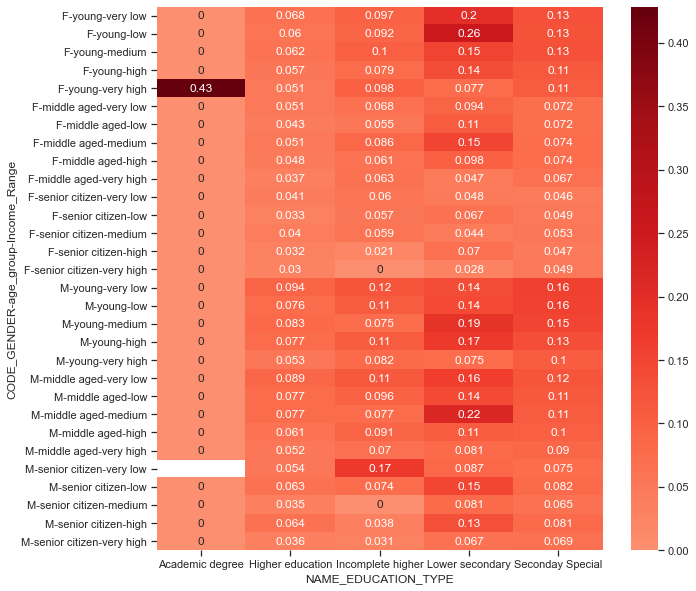

In [130]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot7,cmap="Reds",annot=True,center=0.081)
plt.show()

#### People having lower secondary and Secondary special education have a higher chance to default m while people with higher education has very few defailters. 

# Now Importing the Previous application dataset 

# 

In [131]:
cred_previous=pd.read_csv("previous_application.csv")

In [132]:
cred_previous

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [133]:
cred_previous.isnull().sum()/int(cred_previous.shape[0])*100.0

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

# Cleaning Begins

# 

In [134]:
list_of_n=cred_previous.columns[(cred_previous.isnull().any())].tolist()

In [135]:
list_of_n

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [136]:
col_to_drop_1=[]
for item in list_of_n:
    if((cred_previous[item].isnull().sum()/int(cred_previous.shape[0]) *100.0))>40.0:
        col_to_drop_1.append(item)
    
col_to_drop_1
        

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

#### Dropping columns which have null values greater than 40%


In [137]:
cred_previous.drop(col_to_drop_1,axis=1,inplace=True)

In [138]:
cred_previous.shape

(1670214, 26)

In [139]:
cred_previous.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

In [16]:
#### checking the rest columns with null values

In [140]:
cred_previous.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

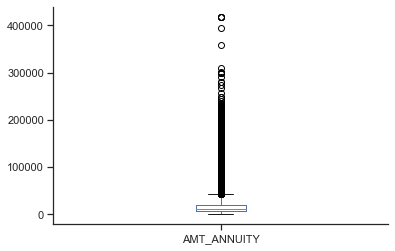

In [141]:
cred_previous.AMT_ANNUITY.plot.box()

In [142]:
cred_previous.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

#### NAME CASH LOAN PURPOSE HAS TOO MANY XNA and XAP values which are randomly missing and thus removing them all as they are present in majority

In [143]:
x=cred_previous[(cred_previous.NAME_CASH_LOAN_PURPOSE=="XNA") | (cred_previous.NAME_CASH_LOAN_PURPOSE=="XAP")].index

In [144]:
cred_previous.drop(x,inplace=True)

In [145]:
cred_previous.shape

(69635, 26)

In [146]:
cred_previous.isnull().sum()

SK_ID_PREV                       0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                    263
AMT_APPLICATION                  0
AMT_CREDIT                       0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
NAME_PAYMENT_TYPE                0
CODE_REJECT_REASON               0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                    263
NAME_YIELD_GROUP                 0
PRODUCT_COMBINATION              0
dtype: int64

In [155]:
cred_previous.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans    1.0
Name: NAME_CONTRACT_TYPE, dtype: float64

In [147]:
cred_previous.DAYS_DECISION.value_counts()

-336     130
-217     130
-630     123
-602     122
-452     121
        ... 
-2356      1
-1194      1
-1258      1
-1300      1
-1291      1
Name: DAYS_DECISION, Length: 2200, dtype: int64

### All are negative values thus changing them


In [148]:
cred_previous.DAYS_DECISION=cred_previous.DAYS_DECISION.apply(lambda x:abs(x))

In [149]:
cred_previous.DAYS_DECISION

4           781
5           684
19          584
51          766
85           13
           ... 
1670056     502
1670167     304
1670185     622
1670189      72
1670206    1833
Name: DAYS_DECISION, Length: 69635, dtype: int64

In [150]:
cred_previous.NAME_GOODS_CATEGORY.value_counts(normalize=True)

XNA    1.0
Name: NAME_GOODS_CATEGORY, dtype: float64

#### Its filled with XNA values only thus dropping it


In [151]:
cred_previous.drop("NAME_GOODS_CATEGORY",axis=1,inplace=True)

In [152]:
cred_previous.shape

(69635, 25)

In [153]:
cred_previous.CODE_REJECT_REASON.value_counts()

XAP       28572
HC        22221
LIMIT      9180
SCO        5167
VERIF      2340
SCOFR      1421
XNA         527
CLIENT      205
SYSTEM        2
Name: CODE_REJECT_REASON, dtype: int64

In [154]:
cred_previous.NAME_SELLER_INDUSTRY.value_counts()

XNA                     63993
Connectivity             5226
Consumer electronics      222
Furniture                 158
MLM partners               18
Construction               12
Industry                    5
Clothing                    1
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [155]:
cred_previous.NAME_YIELD_GROUP.value_counts()

high          28448
middle        18138
low_normal    17830
low_action     4956
XNA             263
Name: NAME_YIELD_GROUP, dtype: int64

In [156]:
cred_previous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   69635 non-null  int64  
 1   SK_ID_CURR                   69635 non-null  int64  
 2   NAME_CONTRACT_TYPE           69635 non-null  object 
 3   AMT_ANNUITY                  69372 non-null  float64
 4   AMT_APPLICATION              69635 non-null  float64
 5   AMT_CREDIT                   69635 non-null  float64
 6   AMT_GOODS_PRICE              69635 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   69635 non-null  object 
 8   HOUR_APPR_PROCESS_START      69635 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  69635 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       69635 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       69635 non-null  object 
 12  NAME_CONTRACT_STATUS         69635 non-null  object 
 13  DAYS_DECISION 

In [157]:
cred_previous.drop(['CODE_REJECT_REASON','SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY'], axis = 1, inplace = True)

In [158]:
cred_previous.shape

(69635, 22)

In [159]:
cred_previous.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      12203
MONDAY       12040
WEDNESDAY    11919
THURSDAY     11360
FRIDAY       11060
SATURDAY      7564
SUNDAY        3489
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [160]:
cred_previous.NFLAG_LAST_APPL_IN_DAY.value_counts()

1    69571
0       64
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64

In [161]:
cred_previous.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    69635
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [162]:
cred_previous.HOUR_APPR_PROCESS_START.value_counts()

11    8507
10    8349
12    7750
13    7152
14    6456
15    5901
9     5744
16    4892
17    3601
8     3338
18    2221
7     2070
6     1100
19     814
5      655
4      464
3      271
20     204
2       60
21      51
22      22
1        7
23       4
0        2
Name: HOUR_APPR_PROCESS_START, dtype: int64

In [163]:
cred_previous.drop(["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT"],axis=1,inplace=True)

In [164]:
cred_previous.shape

(69635, 19)

#### CHANGING SOME COLUMN NAMES BEFORE JOINING 

In [165]:
cred_previous.rename(columns = {'NAME_CONTRACT_TYPE':'NAME_CONTRACT_TYPE_PREV'}, inplace = True)

In [166]:
cred_previous.rename(columns = {'AMT_ANNUITY':'AMT_ANNUITY_PREV'}, inplace = True)

In [167]:
cred_previous.rename(columns = {'AMT_CREDIT':'AMT_CREDIT_PREV'}, inplace = True)

In [168]:
cred_previous.rename(columns = {'AMT_GOODS_PRICE':'AMT_GOODS_PRICE_PREV'}, inplace = True)

## JOINING THE TWO DATASETS cred1 with cred_previous into a new dataset cred_total

In [169]:
cred_total = pd.merge(left=cred1 , right=cred_previous, how='inner', on='SK_ID_CURR')

In [170]:
cred_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   59413 non-null  int64   
 1   TARGET                       59413 non-null  int64   
 2   NAME_CONTRACT_TYPE           59413 non-null  object  
 3   CODE_GENDER                  59413 non-null  object  
 4   FLAG_OWN_CAR                 59413 non-null  int64   
 5   FLAG_OWN_REALTY              59413 non-null  int64   
 6   CNT_CHILDREN                 59413 non-null  int64   
 7   AMT_INCOME_TOTAL             59413 non-null  float64 
 8   AMT_CREDIT                   59413 non-null  float64 
 9   AMT_ANNUITY                  59413 non-null  float64 
 10  AMT_GOODS_PRICE              59413 non-null  float64 
 11  NAME_INCOME_TYPE             59413 non-null  object  
 12  NAME_EDUCATION_TYPE          59413 non-null  object  
 13  N

In [171]:
cred_total.AMT_ANNUITY_PREV.fillna(cred_total.AMT_ANNUITY_PREV.median)

0        22430.4
1        33238.8
2        52513.5
3        28390.6
4        29053.2
          ...   
59408    19607.4
59409    21177.8
59410    5693.09
59411    22770.4
59412    30737.7
Name: AMT_ANNUITY_PREV, Length: 59413, dtype: object

In [172]:


cred_total.NAME_CLIENT_TYPE.replace("XNA","Repeater",inplace=True)

# Univariate and Outlier Analysis

In [187]:
list_to_analyse = ["AMT_ANNUITY_PREV","AMT_APPLICATION","AMT_CREDIT_PREV","AMT_GOODS_PRICE_PREV"]

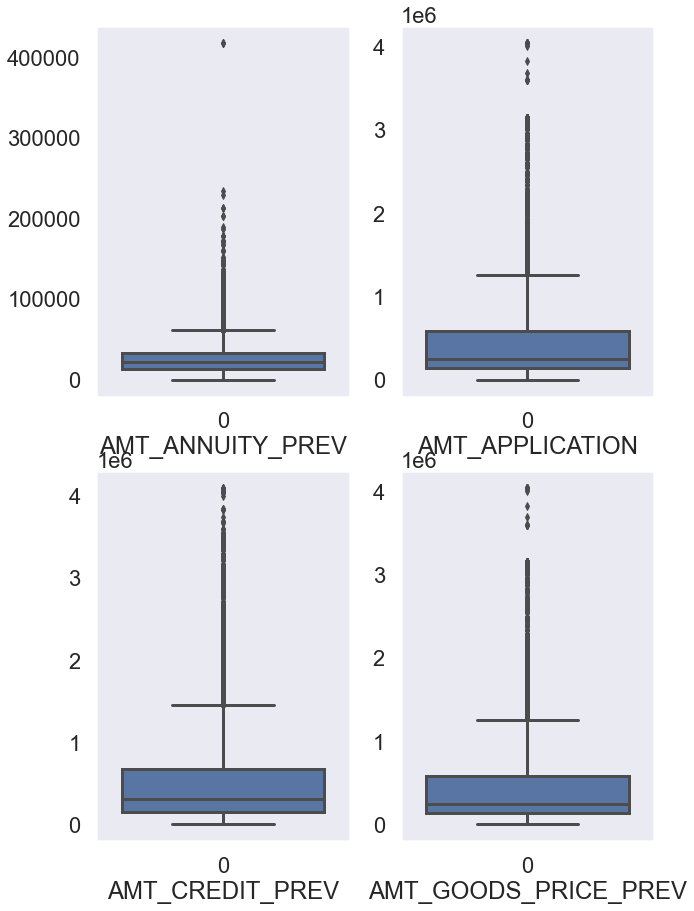

In [190]:
fig, axes = plt.subplots(2, 2,figsize=(10,15))


for item,ax in zip(list_to_analyse, axes.flatten()):
    
    sns.boxplot(data=cred_total[item],ax=ax)
    ax.set_xlabel(item)

    
plt.show()

### We cane see that AMT_CREDIT AMT_GOODS_PRICE and AMT_APPLICATION share a same trend which means mostly clients applied for the loan only for those goods/services they would buy and thus these three share a same pattern.

# 

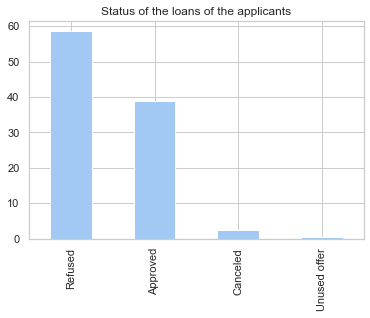

In [192]:
sns.set_theme(style="whitegrid", palette="pastel")
(cred_total['NAME_CONTRACT_STATUS'].value_counts(normalize = True) * 100.0).plot.bar()
plt.title("Status of the loans of the applicants")
plt.show()

### About 58% loans were refused
### About 39% loans were approved
### About 2% loans were cancelled
### About 1% loans were unused offer 

# 

# BIVARIATE AND MULTIVARIATE ANALYSIS

# 

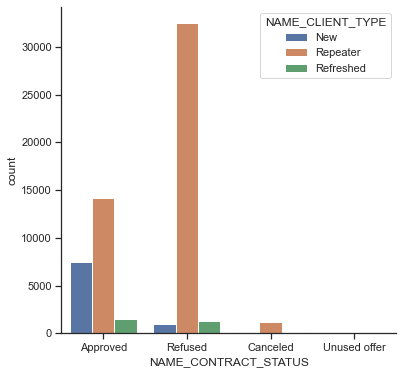

In [173]:
plt.figure(figsize=(6,6))
sns.countplot(data=cred_total,x="NAME_CONTRACT_STATUS",hue="NAME_CLIENT_TYPE")
plt.show()

# 

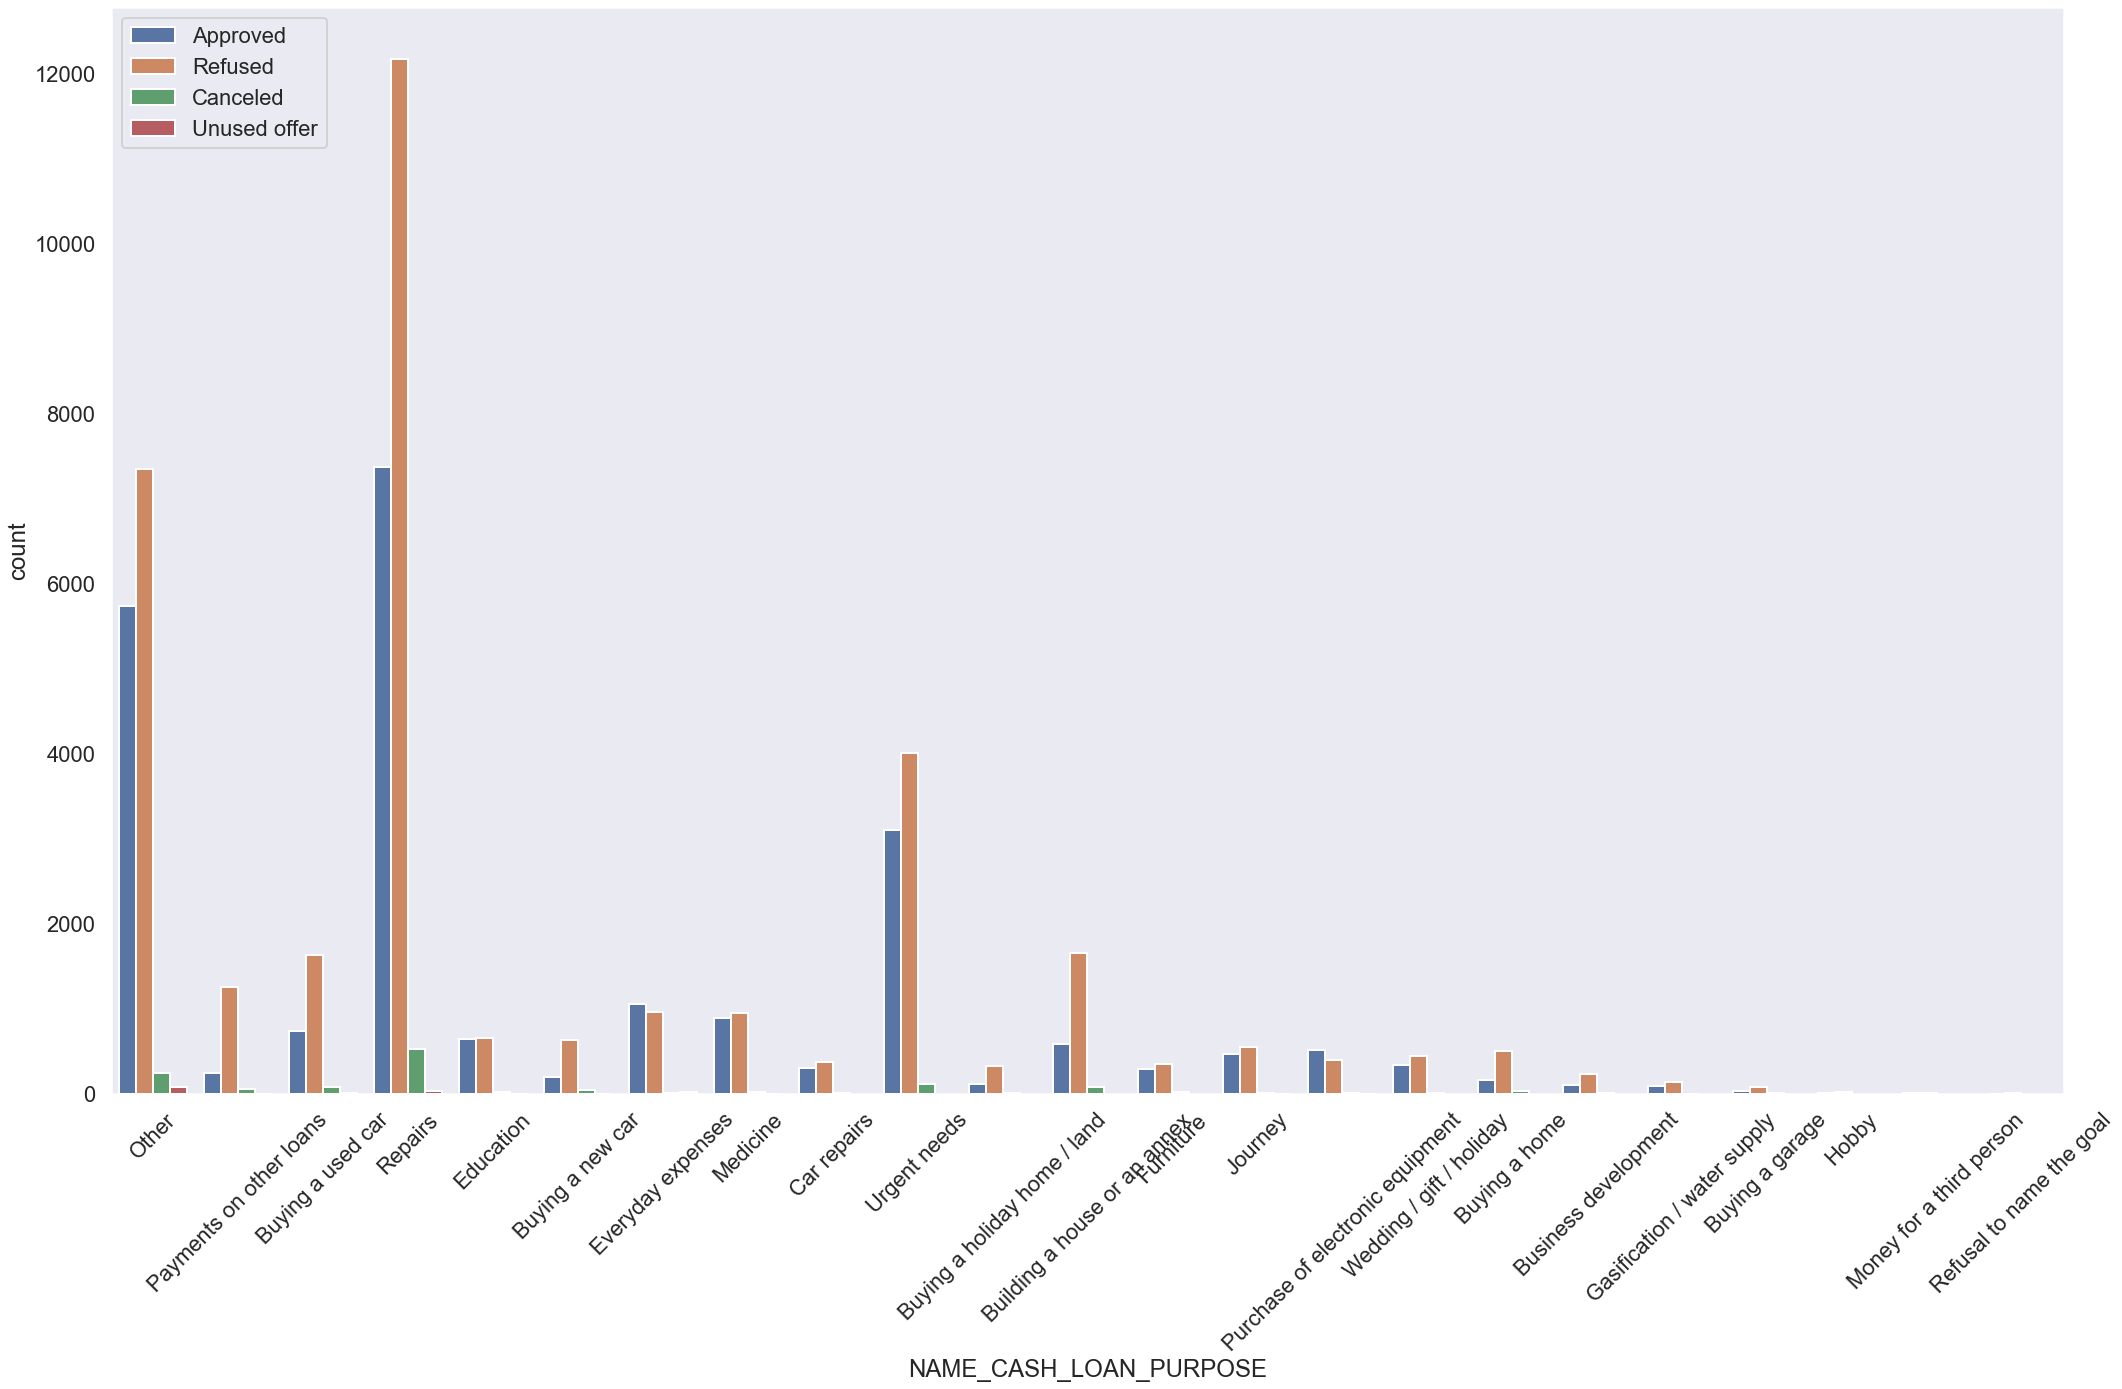

In [174]:
sns.set_style('dark')
sns.set_context('poster')

plt.figure(figsize=(35,20))
sns.countplot(data=cred_total,x="NAME_CASH_LOAN_PURPOSE",hue="NAME_CONTRACT_STATUS")
plt.xticks(rotation=45)
plt.legend(loc="best")
plt.show()

# 

# Heat Maps to get Better understanding

In [175]:
cred_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   SK_ID_CURR                   59413 non-null  int64   
 1   TARGET                       59413 non-null  int64   
 2   NAME_CONTRACT_TYPE           59413 non-null  object  
 3   CODE_GENDER                  59413 non-null  object  
 4   FLAG_OWN_CAR                 59413 non-null  int64   
 5   FLAG_OWN_REALTY              59413 non-null  int64   
 6   CNT_CHILDREN                 59413 non-null  int64   
 7   AMT_INCOME_TOTAL             59413 non-null  float64 
 8   AMT_CREDIT                   59413 non-null  float64 
 9   AMT_ANNUITY                  59413 non-null  float64 
 10  AMT_GOODS_PRICE              59413 non-null  float64 
 11  NAME_INCOME_TYPE             59413 non-null  object  
 12  NAME_EDUCATION_TYPE          59413 non-null  object  
 13  N

In [176]:
pivot8= pd.pivot_table(data = cred_total, values='TARGET', index=['NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE'],
                      columns=['NAME_INCOME_TYPE'], aggfunc=np.mean)


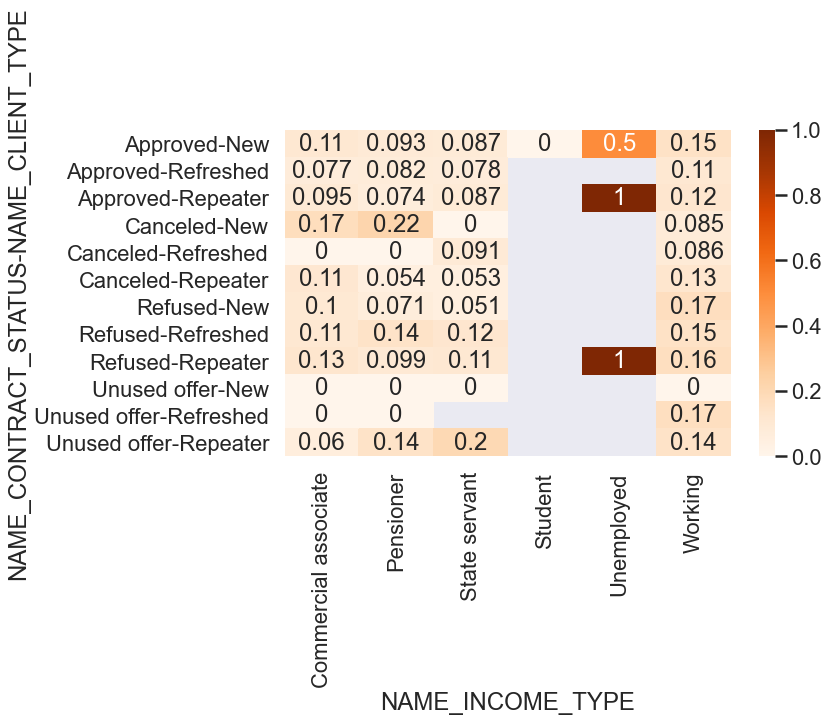

In [177]:
plt.figure(figsize=(10,6))
sns.heatmap(pivot8,cmap="Oranges",annot=True)
plt.show()

### Unemployed people have some of the highest tendencies to become defaulter in some cases they are old clients and are approved while in other cases they are Refused.
### Working people also have a keen tendency to become defaulters. 

In [178]:
pivot9= pd.pivot_table(data = cred_total, values='TARGET', index=['NAME_CASH_LOAN_PURPOSE'],
                      columns=['NAME_CONTRACT_STATUS'], aggfunc=np.mean)

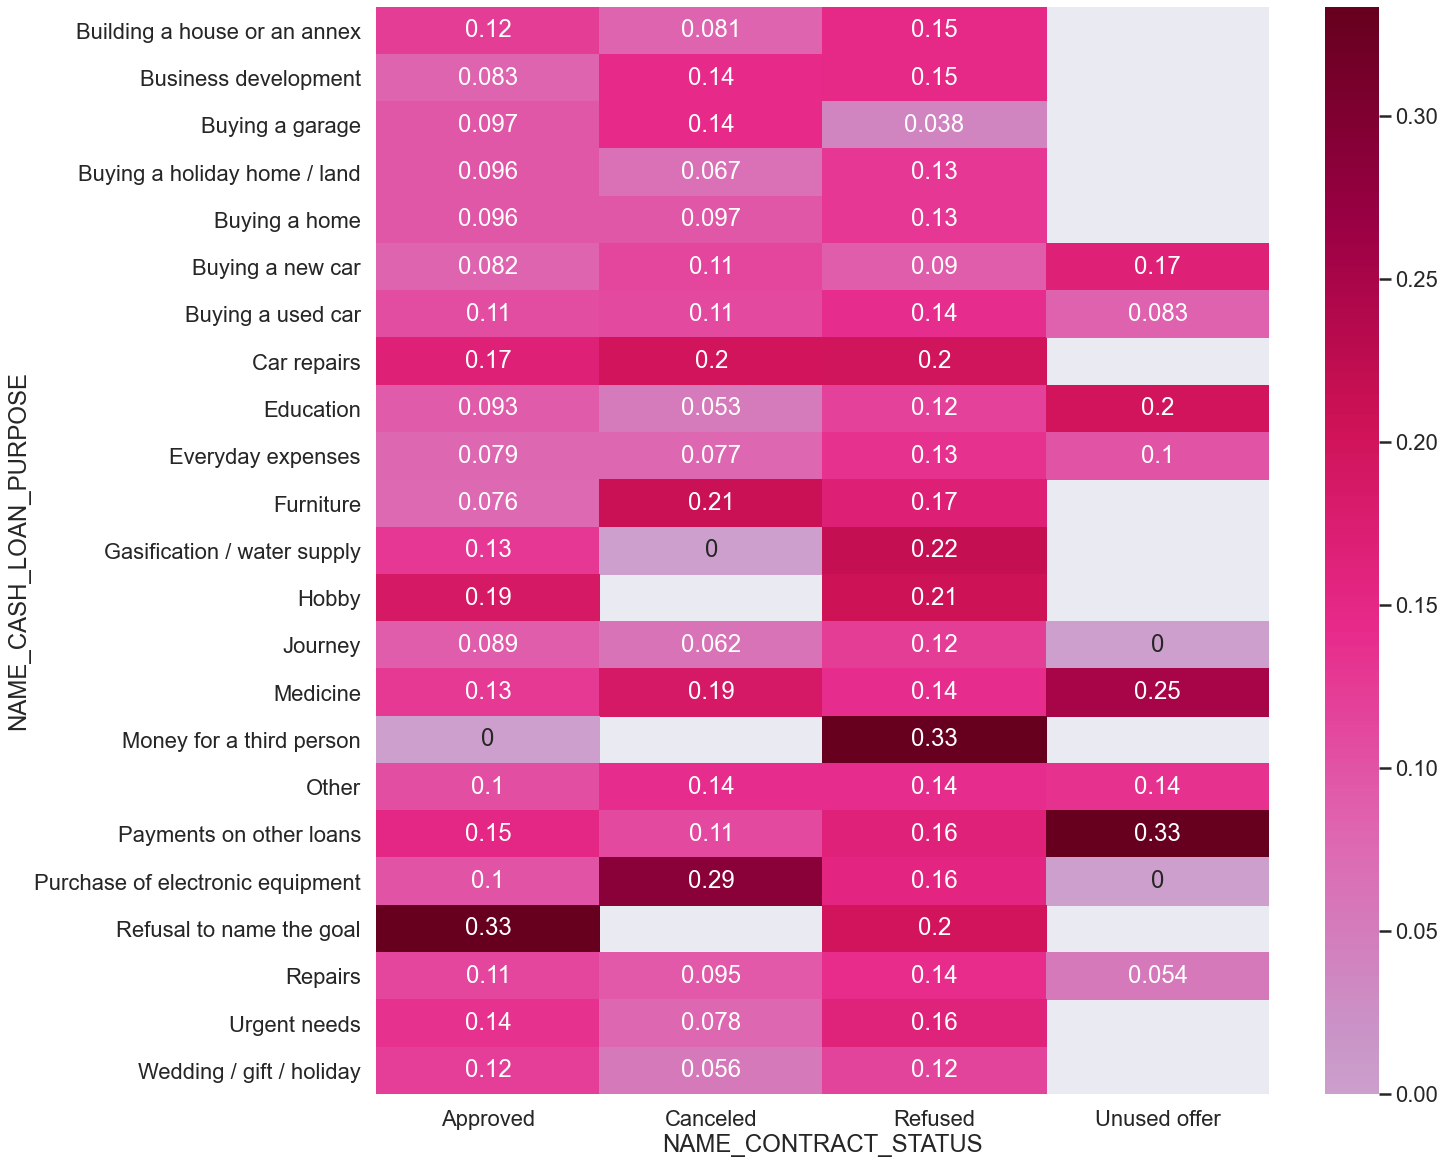

In [179]:
plt.figure(figsize=(20,20))
sns.heatmap(pivot9,cmap="PuRd",annot=True,center=0.081)
plt.show()

### For those people for which the loan was approved we can find that those who Refuse to name their goal are higly keen to become defaulters and next comes those who took loan for a hobby or for car repairs.
### And home loans and buisness developement loans should always be given as they have the least chance to become defaulters.

# 

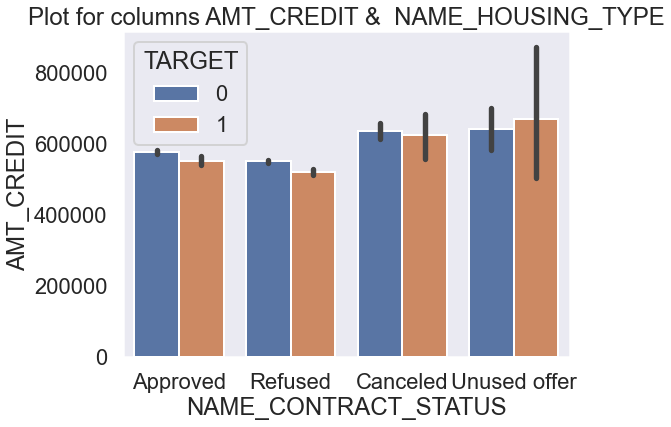

In [180]:
plt.figure(figsize=(8,6))
sns.barplot(data =cred_total, y='AMT_CREDIT',hue='TARGET',x='NAME_CONTRACT_STATUS')
plt.title("Plot for columns AMT_CREDIT &  NAME_HOUSING_TYPE")
plt.show()

### Some of those loans whivh were cancelled or which were of unused offer has the highest loan amount.

In [185]:
pivot10= pd.pivot_table(data = cred_total, values='TARGET', index=['NAME_CONTRACT_STATUS','CODE_GENDER'],
                      columns=['NAME_CONTRACT_TYPE'], aggfunc=np.mean)

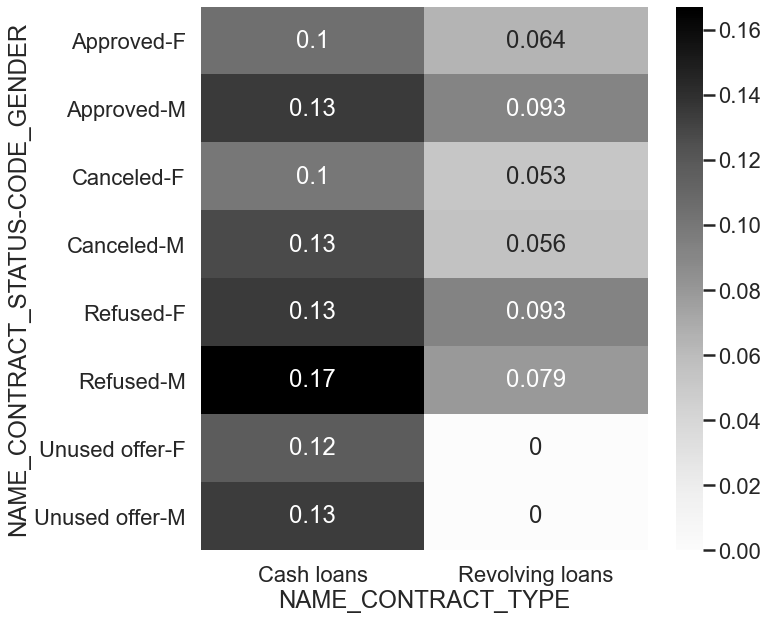

In [186]:
plt.figure(figsize=(10,10))
sns.heatmap(pivot10,cmap="Greys",annot=True,center=0.081)
plt.show()

# FINAL CONCLUSION

### -: We observe that working people have tendency to default and hence have apyment difficuties coping up with the loans and EMIs.Unemployed people are alos finding it difficult to pay on time and thushave very high tendency to default.
### -: And Pensioners and State Servants are very good applicants and should be given loans as they have the least chance to default.

### We can see that most of the people who live in rented apartments have the greatest chance to become defaulters and those with their oen apartments and those whose office is providing them with apartments are better off people with less chance to default.

# 

### -: We ultimately oberseve mostly people take cash loans and the no of defaulters who take cash loans is also more.

# 

### -: Well Academic Degree candidates are the least among non defaulters. Female Young candidates with lower secondary education are most likely to dafult.While Male candidates of Lower secondary and secondary special education has higher defaulters.


# 

### -: Home loans and buisness developement loans should always be given as they have the least chance to become defaulters.Loans taken for causes lke hobbies,and other are likely to default.So the bank should considerably approve loans for those who are asking for Home loans/ car loans.

# 

### -:  The count of ‘Low skilled Laborers’ in ‘OCCUPATION_TYPE’  and realty agents are having most number of defaulters.While Accountants are one of the best applicants and their loan should always be approved .

# 

### -: Mostly middle aged and young people take loans which is normal from the fact that they have lots of responsibilities and are hence taking loans for either pursuing education or fot family reasons.

# 

### -: Ultimately Female applicants are way  better than males and in most cases repay the loan on time.

# 

##  Ultimately after analysing both these datasets we can find a trend of people whose loan should be approved and whose whould be rejected. These analysis points should be taken careof from buisness perspective and thus making decisions that would ultimately profit the bank and help the individual to get their loan sanctioned.